In [1]:
import sys
import pandas as pd 
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import plotly.express as px
%matplotlib inline

In [2]:
parent_dir = os.path.abspath(r'D:')
output_dir = os.path.join(parent_dir, 'processed_data', 'ModelingData')

big_train_path = os.path.join(output_dir, 'big_train.parquet')
big_train_df = pd.read_parquet(big_train_path)

big_test_path = os.path.join(output_dir, 'big_test.parquet')
big_test_df = pd.read_parquet(big_test_path)



In [3]:
columns_to_drop = [
    'wind_speed_mean', 'yaw_error_mean', 'Turbulence',
    'tip_deflection_edge_V1_mean', 'tip_deflection_edge_V2_mean',
    'tip_deflection_edge_V3_mean', 'tip_deflection_flap_V1_mean',
    'tip_deflection_flap_V2_mean', 'tip_deflection_flap_V3_mean',
    'tower_deflection_Y_mean', 'tower_deflection_Z_mean',
    'wind_speed_max', 'wind_speed_median', 'wind_speed_min',
    'wind_speed_q1', 'wind_speed_q3', 'wind_speed_std',
    'yaw_error_max', 'yaw_error_median', 'yaw_error_min',
    'yaw_error_q1', 'yaw_error_q3', 'yaw_error_std',
    'tip_deflection_edge_V1_max', 'tip_deflection_edge_V1_median',
    'tip_deflection_edge_V1_min', 'tip_deflection_edge_V1_q1',
    'tip_deflection_edge_V1_q3', 'tip_deflection_edge_V1_std',
    'tip_deflection_edge_V2_max', 'tip_deflection_edge_V2_median',
    'tip_deflection_edge_V2_min', 'tip_deflection_edge_V2_q1',
    'tip_deflection_edge_V2_q3', 'tip_deflection_edge_V2_std',
    'tip_deflection_edge_V3_max', 'tip_deflection_edge_V3_median',
    'tip_deflection_edge_V3_min', 'tip_deflection_edge_V3_q1',
    'tip_deflection_edge_V3_q3', 'tip_deflection_edge_V3_std',
    'tip_deflection_flap_V1_max', 'tip_deflection_flap_V1_median',
    'tip_deflection_flap_V1_min', 'tip_deflection_flap_V1_q1',
    'tip_deflection_flap_V1_q3', 'tip_deflection_flap_V1_std',
    'tip_deflection_flap_V2_max', 'tip_deflection_flap_V2_median',
    'tip_deflection_flap_V2_min', 'tip_deflection_flap_V2_q1',
    'tip_deflection_flap_V2_q3', 'tip_deflection_flap_V2_std',
    'tip_deflection_flap_V3_max', 'tip_deflection_flap_V3_median',
    'tip_deflection_flap_V3_min', 'tip_deflection_flap_V3_q1',
    'tip_deflection_flap_V3_q3', 'tip_deflection_flap_V3_std',
    'tower_deflection_Y_max', 'tower_deflection_Y_median',
    'tower_deflection_Y_min', 'tower_deflection_Y_q1',
    'tower_deflection_Y_q3', 'tower_deflection_Y_std',
    'tower_deflection_Z_max', 'tower_deflection_Z_median',
    'tower_deflection_Z_min', 'tower_deflection_Z_q1',
    'tower_deflection_Z_q3', 'tower_deflection_Z_std'
]

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y


Learning rate set to 0.078607
0:	learn: 5.7840179	total: 158ms	remaining: 2m 37s
1:	learn: 5.3427731	total: 181ms	remaining: 1m 30s
2:	learn: 4.9383462	total: 205ms	remaining: 1m 8s
3:	learn: 4.5655233	total: 232ms	remaining: 57.7s
4:	learn: 4.2201910	total: 255ms	remaining: 50.7s
5:	learn: 3.9018714	total: 277ms	remaining: 45.9s
6:	learn: 3.6078823	total: 299ms	remaining: 42.4s
7:	learn: 3.3356669	total: 320ms	remaining: 39.7s
8:	learn: 3.0856995	total: 341ms	remaining: 37.6s
9:	learn: 2.8541961	total: 362ms	remaining: 35.9s
10:	learn: 2.6422536	total: 384ms	remaining: 34.5s
11:	learn: 2.4467798	total: 412ms	remaining: 33.9s
12:	learn: 2.2648089	total: 437ms	remaining: 33.2s
13:	learn: 2.0972883	total: 461ms	remaining: 32.4s
14:	learn: 1.9446211	total: 483ms	remaining: 31.7s
15:	learn: 1.8045216	total: 506ms	remaining: 31.1s
16:	learn: 1.6737459	total: 526ms	remaining: 30.4s
17:	learn: 1.5539020	total: 547ms	remaining: 29.9s
18:	learn: 1.4436707	total: 569ms	remaining: 29.4s
19:	learn

169:	learn: 0.2621836	total: 3.72s	remaining: 18.2s
170:	learn: 0.2616732	total: 3.74s	remaining: 18.1s
171:	learn: 0.2612083	total: 3.77s	remaining: 18.1s
172:	learn: 0.2608394	total: 3.78s	remaining: 18.1s
173:	learn: 0.2604623	total: 3.8s	remaining: 18.1s
174:	learn: 0.2601899	total: 3.82s	remaining: 18s
175:	learn: 0.2597834	total: 3.84s	remaining: 18s
176:	learn: 0.2593114	total: 3.86s	remaining: 18s
177:	learn: 0.2587568	total: 3.88s	remaining: 17.9s
178:	learn: 0.2584304	total: 3.9s	remaining: 17.9s
179:	learn: 0.2579425	total: 3.92s	remaining: 17.9s
180:	learn: 0.2576977	total: 3.94s	remaining: 17.8s
181:	learn: 0.2573137	total: 3.96s	remaining: 17.8s
182:	learn: 0.2569220	total: 3.98s	remaining: 17.8s
183:	learn: 0.2564732	total: 4s	remaining: 17.7s
184:	learn: 0.2560586	total: 4.02s	remaining: 17.7s
185:	learn: 0.2556568	total: 4.04s	remaining: 17.7s
186:	learn: 0.2554493	total: 4.05s	remaining: 17.6s
187:	learn: 0.2550088	total: 4.07s	remaining: 17.6s
188:	learn: 0.2545312	t

338:	learn: 0.2072664	total: 7.23s	remaining: 14.1s
339:	learn: 0.2069884	total: 7.25s	remaining: 14.1s
340:	learn: 0.2067261	total: 7.27s	remaining: 14.1s
341:	learn: 0.2064881	total: 7.29s	remaining: 14s
342:	learn: 0.2063051	total: 7.31s	remaining: 14s
343:	learn: 0.2060307	total: 7.33s	remaining: 14s
344:	learn: 0.2058671	total: 7.35s	remaining: 14s
345:	learn: 0.2056253	total: 7.37s	remaining: 13.9s
346:	learn: 0.2054537	total: 7.39s	remaining: 13.9s
347:	learn: 0.2052468	total: 7.41s	remaining: 13.9s
348:	learn: 0.2051197	total: 7.43s	remaining: 13.9s
349:	learn: 0.2048881	total: 7.45s	remaining: 13.8s
350:	learn: 0.2046980	total: 7.47s	remaining: 13.8s
351:	learn: 0.2044284	total: 7.49s	remaining: 13.8s
352:	learn: 0.2041950	total: 7.51s	remaining: 13.8s
353:	learn: 0.2040062	total: 7.53s	remaining: 13.7s
354:	learn: 0.2038785	total: 7.55s	remaining: 13.7s
355:	learn: 0.2036481	total: 7.57s	remaining: 13.7s
356:	learn: 0.2034726	total: 7.59s	remaining: 13.7s
357:	learn: 0.203253

507:	learn: 0.1759004	total: 10.7s	remaining: 10.3s
508:	learn: 0.1757792	total: 10.7s	remaining: 10.3s
509:	learn: 0.1756310	total: 10.7s	remaining: 10.3s
510:	learn: 0.1755483	total: 10.7s	remaining: 10.3s
511:	learn: 0.1754330	total: 10.7s	remaining: 10.2s
512:	learn: 0.1753269	total: 10.8s	remaining: 10.2s
513:	learn: 0.1751498	total: 10.8s	remaining: 10.2s
514:	learn: 0.1750695	total: 10.8s	remaining: 10.2s
515:	learn: 0.1749639	total: 10.8s	remaining: 10.2s
516:	learn: 0.1748600	total: 10.8s	remaining: 10.1s
517:	learn: 0.1746849	total: 10.9s	remaining: 10.1s
518:	learn: 0.1745523	total: 10.9s	remaining: 10.1s
519:	learn: 0.1744719	total: 10.9s	remaining: 10.1s
520:	learn: 0.1743769	total: 10.9s	remaining: 10s
521:	learn: 0.1742337	total: 10.9s	remaining: 10s
522:	learn: 0.1741168	total: 11s	remaining: 9.99s
523:	learn: 0.1739591	total: 11s	remaining: 9.97s
524:	learn: 0.1738172	total: 11s	remaining: 9.95s
525:	learn: 0.1736915	total: 11s	remaining: 9.92s
526:	learn: 0.1735638	to

670:	learn: 0.1548604	total: 13.9s	remaining: 6.83s
671:	learn: 0.1547843	total: 14s	remaining: 6.81s
672:	learn: 0.1546904	total: 14s	remaining: 6.79s
673:	learn: 0.1546288	total: 14s	remaining: 6.77s
674:	learn: 0.1544871	total: 14s	remaining: 6.75s
675:	learn: 0.1543673	total: 14s	remaining: 6.73s
676:	learn: 0.1542498	total: 14.1s	remaining: 6.7s
677:	learn: 0.1540955	total: 14.1s	remaining: 6.68s
678:	learn: 0.1540179	total: 14.1s	remaining: 6.66s
679:	learn: 0.1539019	total: 14.1s	remaining: 6.64s
680:	learn: 0.1538351	total: 14.1s	remaining: 6.62s
681:	learn: 0.1537602	total: 14.1s	remaining: 6.6s
682:	learn: 0.1536801	total: 14.2s	remaining: 6.57s
683:	learn: 0.1536419	total: 14.2s	remaining: 6.55s
684:	learn: 0.1535291	total: 14.2s	remaining: 6.53s
685:	learn: 0.1534359	total: 14.2s	remaining: 6.51s
686:	learn: 0.1532712	total: 14.2s	remaining: 6.49s
687:	learn: 0.1531754	total: 14.3s	remaining: 6.47s
688:	learn: 0.1531023	total: 14.3s	remaining: 6.45s
689:	learn: 0.1530258	to

835:	learn: 0.1397513	total: 17.2s	remaining: 3.37s
836:	learn: 0.1396487	total: 17.2s	remaining: 3.35s
837:	learn: 0.1395541	total: 17.2s	remaining: 3.33s
838:	learn: 0.1394439	total: 17.2s	remaining: 3.31s
839:	learn: 0.1393735	total: 17.3s	remaining: 3.29s
840:	learn: 0.1393327	total: 17.3s	remaining: 3.26s
841:	learn: 0.1392581	total: 17.3s	remaining: 3.24s
842:	learn: 0.1392136	total: 17.3s	remaining: 3.22s
843:	learn: 0.1391060	total: 17.3s	remaining: 3.2s
844:	learn: 0.1390105	total: 17.3s	remaining: 3.18s
845:	learn: 0.1389247	total: 17.4s	remaining: 3.16s
846:	learn: 0.1388754	total: 17.4s	remaining: 3.14s
847:	learn: 0.1387989	total: 17.4s	remaining: 3.12s
848:	learn: 0.1387422	total: 17.4s	remaining: 3.1s
849:	learn: 0.1386843	total: 17.4s	remaining: 3.08s
850:	learn: 0.1385866	total: 17.5s	remaining: 3.06s
851:	learn: 0.1385117	total: 17.5s	remaining: 3.04s
852:	learn: 0.1384232	total: 17.5s	remaining: 3.02s
853:	learn: 0.1383561	total: 17.5s	remaining: 3s
854:	learn: 0.138

996:	learn: 0.1282075	total: 20.4s	remaining: 61.5ms
997:	learn: 0.1281449	total: 20.5s	remaining: 41ms
998:	learn: 0.1280412	total: 20.5s	remaining: 20.5ms
999:	learn: 0.1280140	total: 20.5s	remaining: 0us
Target Variable: wind_speed_mean
Training MAE: 0.09571481680371542
Training MSE: 0.016387594633716435
Training RMSE: 0.12801404076786435
Training R2: 0.9995815600147775

Test MAE: 0.13092123943617587
Test MSE: 0.03045410505204045
Test RMSE: 0.17451104564479708
Test R2: 0.9991794086145068



C:\Users\musab\AppData\Local\Temp\ipykernel_16800\2236467310.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\musab\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


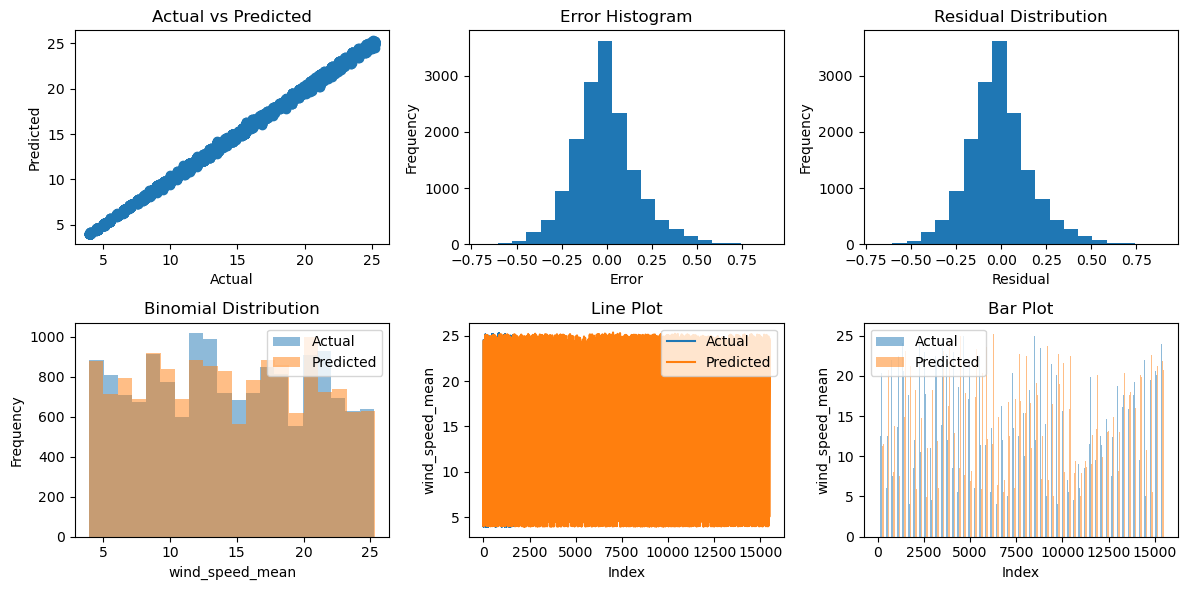

Learning rate set to 0.078607
0:	learn: 11.5946620	total: 30.7ms	remaining: 30.7s
1:	learn: 11.3582433	total: 59.4ms	remaining: 29.6s
2:	learn: 11.1652056	total: 94.8ms	remaining: 31.5s
3:	learn: 10.9924202	total: 124ms	remaining: 30.9s
4:	learn: 10.8283830	total: 147ms	remaining: 29.3s
5:	learn: 10.6784947	total: 172ms	remaining: 28.5s
6:	learn: 10.5482597	total: 196ms	remaining: 27.9s
7:	learn: 10.4296757	total: 220ms	remaining: 27.3s
8:	learn: 10.3336283	total: 239ms	remaining: 26.4s
9:	learn: 10.2326463	total: 301ms	remaining: 29.8s
10:	learn: 10.1477725	total: 321ms	remaining: 28.9s
11:	learn: 10.0529559	total: 344ms	remaining: 28.3s
12:	learn: 9.9826198	total: 365ms	remaining: 27.7s
13:	learn: 9.9196671	total: 387ms	remaining: 27.3s
14:	learn: 9.8428255	total: 410ms	remaining: 27s
15:	learn: 9.7897722	total: 434ms	remaining: 26.7s
16:	learn: 9.7272287	total: 457ms	remaining: 26.4s
17:	learn: 9.6760253	total: 479ms	remaining: 26.1s
18:	learn: 9.6321018	total: 499ms	remaining: 25.8

160:	learn: 7.4945584	total: 3.66s	remaining: 19.1s
161:	learn: 7.4860277	total: 3.68s	remaining: 19s
162:	learn: 7.4779248	total: 3.7s	remaining: 19s
163:	learn: 7.4670059	total: 3.72s	remaining: 19s
164:	learn: 7.4594036	total: 3.74s	remaining: 18.9s
165:	learn: 7.4483899	total: 3.76s	remaining: 18.9s
166:	learn: 7.4423651	total: 3.79s	remaining: 18.9s
167:	learn: 7.4358427	total: 3.81s	remaining: 18.9s
168:	learn: 7.4267006	total: 3.83s	remaining: 18.8s
169:	learn: 7.4168640	total: 3.85s	remaining: 18.8s
170:	learn: 7.4092803	total: 3.88s	remaining: 18.8s
171:	learn: 7.4028173	total: 3.9s	remaining: 18.8s
172:	learn: 7.3952611	total: 3.92s	remaining: 18.8s
173:	learn: 7.3841837	total: 3.95s	remaining: 18.7s
174:	learn: 7.3751230	total: 3.97s	remaining: 18.7s
175:	learn: 7.3677269	total: 3.99s	remaining: 18.7s
176:	learn: 7.3621049	total: 4.01s	remaining: 18.7s
177:	learn: 7.3548423	total: 4.04s	remaining: 18.7s
178:	learn: 7.3447251	total: 4.07s	remaining: 18.7s
179:	learn: 7.338894

319:	learn: 6.6011962	total: 7.15s	remaining: 15.2s
320:	learn: 6.5968556	total: 7.17s	remaining: 15.2s
321:	learn: 6.5934209	total: 7.19s	remaining: 15.1s
322:	learn: 6.5903742	total: 7.21s	remaining: 15.1s
323:	learn: 6.5877477	total: 7.23s	remaining: 15.1s
324:	learn: 6.5833870	total: 7.26s	remaining: 15.1s
325:	learn: 6.5788912	total: 7.28s	remaining: 15.1s
326:	learn: 6.5735328	total: 7.3s	remaining: 15s
327:	learn: 6.5677202	total: 7.33s	remaining: 15s
328:	learn: 6.5644013	total: 7.35s	remaining: 15s
329:	learn: 6.5619549	total: 7.37s	remaining: 15s
330:	learn: 6.5572022	total: 7.39s	remaining: 14.9s
331:	learn: 6.5535399	total: 7.41s	remaining: 14.9s
332:	learn: 6.5479337	total: 7.43s	remaining: 14.9s
333:	learn: 6.5443289	total: 7.45s	remaining: 14.9s
334:	learn: 6.5422155	total: 7.47s	remaining: 14.8s
335:	learn: 6.5386794	total: 7.5s	remaining: 14.8s
336:	learn: 6.5345284	total: 7.51s	remaining: 14.8s
337:	learn: 6.5314138	total: 7.53s	remaining: 14.8s
338:	learn: 6.5288456	

481:	learn: 6.0391974	total: 10.6s	remaining: 11.4s
482:	learn: 6.0369699	total: 10.7s	remaining: 11.4s
483:	learn: 6.0336173	total: 10.7s	remaining: 11.4s
484:	learn: 6.0304094	total: 10.7s	remaining: 11.4s
485:	learn: 6.0284548	total: 10.7s	remaining: 11.3s
486:	learn: 6.0255161	total: 10.7s	remaining: 11.3s
487:	learn: 6.0228848	total: 10.8s	remaining: 11.3s
488:	learn: 6.0192649	total: 10.8s	remaining: 11.3s
489:	learn: 6.0168412	total: 10.8s	remaining: 11.3s
490:	learn: 6.0128435	total: 10.8s	remaining: 11.2s
491:	learn: 6.0076925	total: 10.9s	remaining: 11.2s
492:	learn: 6.0054738	total: 10.9s	remaining: 11.2s
493:	learn: 6.0036928	total: 10.9s	remaining: 11.2s
494:	learn: 6.0002768	total: 10.9s	remaining: 11.1s
495:	learn: 5.9960820	total: 10.9s	remaining: 11.1s
496:	learn: 5.9930174	total: 11s	remaining: 11.1s
497:	learn: 5.9883907	total: 11s	remaining: 11.1s
498:	learn: 5.9868501	total: 11s	remaining: 11s
499:	learn: 5.9833433	total: 11s	remaining: 11s
500:	learn: 5.9793755	to

642:	learn: 5.6087252	total: 14.1s	remaining: 7.84s
643:	learn: 5.6060263	total: 14.2s	remaining: 7.82s
644:	learn: 5.6033215	total: 14.2s	remaining: 7.8s
645:	learn: 5.6012352	total: 14.2s	remaining: 7.78s
646:	learn: 5.5991441	total: 14.2s	remaining: 7.76s
647:	learn: 5.5971473	total: 14.2s	remaining: 7.74s
648:	learn: 5.5952941	total: 14.3s	remaining: 7.71s
649:	learn: 5.5932753	total: 14.3s	remaining: 7.69s
650:	learn: 5.5903075	total: 14.3s	remaining: 7.67s
651:	learn: 5.5860678	total: 14.3s	remaining: 7.65s
652:	learn: 5.5843220	total: 14.4s	remaining: 7.63s
653:	learn: 5.5815040	total: 14.4s	remaining: 7.61s
654:	learn: 5.5799757	total: 14.4s	remaining: 7.58s
655:	learn: 5.5776710	total: 14.4s	remaining: 7.56s
656:	learn: 5.5740904	total: 14.4s	remaining: 7.54s
657:	learn: 5.5716561	total: 14.5s	remaining: 7.52s
658:	learn: 5.5694294	total: 14.5s	remaining: 7.5s
659:	learn: 5.5671705	total: 14.5s	remaining: 7.47s
660:	learn: 5.5655275	total: 14.5s	remaining: 7.46s
661:	learn: 5.

801:	learn: 5.2764884	total: 17.6s	remaining: 4.34s
802:	learn: 5.2747392	total: 17.6s	remaining: 4.32s
803:	learn: 5.2730571	total: 17.6s	remaining: 4.3s
804:	learn: 5.2722229	total: 17.7s	remaining: 4.28s
805:	learn: 5.2710623	total: 17.7s	remaining: 4.25s
806:	learn: 5.2695580	total: 17.7s	remaining: 4.23s
807:	learn: 5.2672277	total: 17.7s	remaining: 4.21s
808:	learn: 5.2640836	total: 17.7s	remaining: 4.19s
809:	learn: 5.2620515	total: 17.8s	remaining: 4.17s
810:	learn: 5.2611313	total: 17.8s	remaining: 4.14s
811:	learn: 5.2598565	total: 17.8s	remaining: 4.12s
812:	learn: 5.2578397	total: 17.8s	remaining: 4.1s
813:	learn: 5.2545255	total: 17.8s	remaining: 4.08s
814:	learn: 5.2525014	total: 17.9s	remaining: 4.05s
815:	learn: 5.2502412	total: 17.9s	remaining: 4.03s
816:	learn: 5.2473588	total: 17.9s	remaining: 4.01s
817:	learn: 5.2457280	total: 17.9s	remaining: 3.99s
818:	learn: 5.2435528	total: 17.9s	remaining: 3.96s
819:	learn: 5.2423063	total: 18s	remaining: 3.94s
820:	learn: 5.24

967:	learn: 4.9887357	total: 21s	remaining: 695ms
968:	learn: 4.9875610	total: 21.1s	remaining: 673ms
969:	learn: 4.9864236	total: 21.1s	remaining: 652ms
970:	learn: 4.9850790	total: 21.1s	remaining: 630ms
971:	learn: 4.9838237	total: 21.1s	remaining: 608ms
972:	learn: 4.9819288	total: 21.1s	remaining: 586ms
973:	learn: 4.9806306	total: 21.2s	remaining: 565ms
974:	learn: 4.9782725	total: 21.2s	remaining: 543ms
975:	learn: 4.9765172	total: 21.2s	remaining: 521ms
976:	learn: 4.9750099	total: 21.2s	remaining: 499ms
977:	learn: 4.9735156	total: 21.2s	remaining: 478ms
978:	learn: 4.9710526	total: 21.3s	remaining: 456ms
979:	learn: 4.9705187	total: 21.3s	remaining: 434ms
980:	learn: 4.9687579	total: 21.3s	remaining: 412ms
981:	learn: 4.9675619	total: 21.3s	remaining: 391ms
982:	learn: 4.9662579	total: 21.3s	remaining: 369ms
983:	learn: 4.9652011	total: 21.4s	remaining: 347ms
984:	learn: 4.9639725	total: 21.4s	remaining: 325ms
985:	learn: 4.9612997	total: 21.4s	remaining: 304ms
986:	learn: 4.

C:\Users\musab\AppData\Local\Temp\ipykernel_16800\2236467310.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


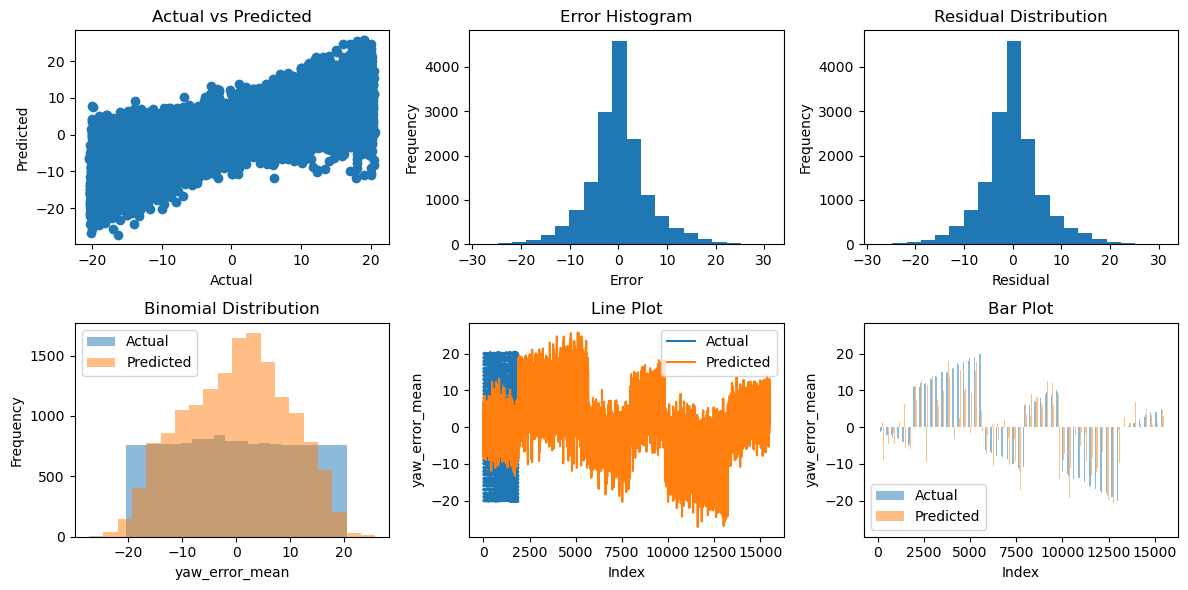

Learning rate set to 0.078607
0:	learn: 0.0264059	total: 23.8ms	remaining: 23.8s
1:	learn: 0.0250131	total: 46.4ms	remaining: 23.2s
2:	learn: 0.0236686	total: 66.9ms	remaining: 22.2s
3:	learn: 0.0224997	total: 88ms	remaining: 21.9s
4:	learn: 0.0214229	total: 109ms	remaining: 21.6s
5:	learn: 0.0203789	total: 131ms	remaining: 21.7s
6:	learn: 0.0193345	total: 151ms	remaining: 21.5s
7:	learn: 0.0185002	total: 173ms	remaining: 21.4s
8:	learn: 0.0176437	total: 195ms	remaining: 21.4s
9:	learn: 0.0168865	total: 213ms	remaining: 21.1s
10:	learn: 0.0161581	total: 234ms	remaining: 21.1s
11:	learn: 0.0154471	total: 256ms	remaining: 21.1s
12:	learn: 0.0147661	total: 279ms	remaining: 21.1s
13:	learn: 0.0142245	total: 297ms	remaining: 20.9s
14:	learn: 0.0136541	total: 318ms	remaining: 20.9s
15:	learn: 0.0131622	total: 338ms	remaining: 20.8s
16:	learn: 0.0126747	total: 360ms	remaining: 20.8s
17:	learn: 0.0122875	total: 378ms	remaining: 20.6s
18:	learn: 0.0118782	total: 399ms	remaining: 20.6s
19:	learn

168:	learn: 0.0036210	total: 3.41s	remaining: 16.8s
169:	learn: 0.0036159	total: 3.43s	remaining: 16.7s
170:	learn: 0.0036062	total: 3.45s	remaining: 16.7s
171:	learn: 0.0035998	total: 3.47s	remaining: 16.7s
172:	learn: 0.0035915	total: 3.49s	remaining: 16.7s
173:	learn: 0.0035784	total: 3.51s	remaining: 16.7s
174:	learn: 0.0035707	total: 3.53s	remaining: 16.7s
175:	learn: 0.0035624	total: 3.56s	remaining: 16.7s
176:	learn: 0.0035579	total: 3.58s	remaining: 16.6s
177:	learn: 0.0035499	total: 3.6s	remaining: 16.6s
178:	learn: 0.0035395	total: 3.62s	remaining: 16.6s
179:	learn: 0.0035323	total: 3.65s	remaining: 16.6s
180:	learn: 0.0035219	total: 3.67s	remaining: 16.6s
181:	learn: 0.0035097	total: 3.69s	remaining: 16.6s
182:	learn: 0.0035037	total: 3.71s	remaining: 16.6s
183:	learn: 0.0034989	total: 3.73s	remaining: 16.5s
184:	learn: 0.0034886	total: 3.75s	remaining: 16.5s
185:	learn: 0.0034780	total: 3.77s	remaining: 16.5s
186:	learn: 0.0034662	total: 3.79s	remaining: 16.5s
187:	learn: 0

330:	learn: 0.0027946	total: 6.66s	remaining: 13.5s
331:	learn: 0.0027928	total: 6.68s	remaining: 13.4s
332:	learn: 0.0027899	total: 6.7s	remaining: 13.4s
333:	learn: 0.0027864	total: 6.72s	remaining: 13.4s
334:	learn: 0.0027836	total: 6.74s	remaining: 13.4s
335:	learn: 0.0027811	total: 6.76s	remaining: 13.4s
336:	learn: 0.0027797	total: 6.78s	remaining: 13.3s
337:	learn: 0.0027767	total: 6.8s	remaining: 13.3s
338:	learn: 0.0027736	total: 6.82s	remaining: 13.3s
339:	learn: 0.0027695	total: 6.84s	remaining: 13.3s
340:	learn: 0.0027663	total: 6.86s	remaining: 13.3s
341:	learn: 0.0027630	total: 6.88s	remaining: 13.2s
342:	learn: 0.0027610	total: 6.9s	remaining: 13.2s
343:	learn: 0.0027567	total: 6.92s	remaining: 13.2s
344:	learn: 0.0027529	total: 6.94s	remaining: 13.2s
345:	learn: 0.0027488	total: 6.96s	remaining: 13.1s
346:	learn: 0.0027456	total: 6.97s	remaining: 13.1s
347:	learn: 0.0027441	total: 6.99s	remaining: 13.1s
348:	learn: 0.0027407	total: 7.01s	remaining: 13.1s
349:	learn: 0.0

491:	learn: 0.0024258	total: 9.97s	remaining: 10.3s
492:	learn: 0.0024245	total: 9.99s	remaining: 10.3s
493:	learn: 0.0024228	total: 10s	remaining: 10.3s
494:	learn: 0.0024209	total: 10s	remaining: 10.2s
495:	learn: 0.0024191	total: 10.1s	remaining: 10.2s
496:	learn: 0.0024176	total: 10.1s	remaining: 10.2s
497:	learn: 0.0024161	total: 10.1s	remaining: 10.2s
498:	learn: 0.0024146	total: 10.1s	remaining: 10.2s
499:	learn: 0.0024129	total: 10.1s	remaining: 10.1s
500:	learn: 0.0024114	total: 10.2s	remaining: 10.1s
501:	learn: 0.0024105	total: 10.2s	remaining: 10.1s
502:	learn: 0.0024076	total: 10.2s	remaining: 10.1s
503:	learn: 0.0024050	total: 10.2s	remaining: 10.1s
504:	learn: 0.0024035	total: 10.2s	remaining: 10s
505:	learn: 0.0024023	total: 10.3s	remaining: 10s
506:	learn: 0.0024003	total: 10.3s	remaining: 10s
507:	learn: 0.0023981	total: 10.3s	remaining: 9.98s
508:	learn: 0.0023960	total: 10.3s	remaining: 9.96s
509:	learn: 0.0023949	total: 10.3s	remaining: 9.94s
510:	learn: 0.0023938	

658:	learn: 0.0021842	total: 13.7s	remaining: 7.08s
659:	learn: 0.0021829	total: 13.7s	remaining: 7.06s
660:	learn: 0.0021818	total: 13.7s	remaining: 7.04s
661:	learn: 0.0021801	total: 13.7s	remaining: 7.01s
662:	learn: 0.0021784	total: 13.8s	remaining: 6.99s
663:	learn: 0.0021771	total: 13.8s	remaining: 6.97s
664:	learn: 0.0021752	total: 13.8s	remaining: 6.95s
665:	learn: 0.0021740	total: 13.8s	remaining: 6.93s
666:	learn: 0.0021731	total: 13.8s	remaining: 6.91s
667:	learn: 0.0021721	total: 13.9s	remaining: 6.89s
668:	learn: 0.0021708	total: 13.9s	remaining: 6.87s
669:	learn: 0.0021687	total: 13.9s	remaining: 6.85s
670:	learn: 0.0021677	total: 13.9s	remaining: 6.83s
671:	learn: 0.0021658	total: 13.9s	remaining: 6.8s
672:	learn: 0.0021648	total: 14s	remaining: 6.78s
673:	learn: 0.0021635	total: 14s	remaining: 6.76s
674:	learn: 0.0021612	total: 14s	remaining: 6.74s
675:	learn: 0.0021597	total: 14s	remaining: 6.72s
676:	learn: 0.0021588	total: 14s	remaining: 6.7s
677:	learn: 0.0021580	to

824:	learn: 0.0020054	total: 17.1s	remaining: 3.63s
825:	learn: 0.0020041	total: 17.2s	remaining: 3.61s
826:	learn: 0.0020031	total: 17.2s	remaining: 3.59s
827:	learn: 0.0020027	total: 17.2s	remaining: 3.57s
828:	learn: 0.0020019	total: 17.2s	remaining: 3.55s
829:	learn: 0.0020008	total: 17.2s	remaining: 3.53s
830:	learn: 0.0020000	total: 17.3s	remaining: 3.51s
831:	learn: 0.0019991	total: 17.3s	remaining: 3.49s
832:	learn: 0.0019984	total: 17.3s	remaining: 3.47s
833:	learn: 0.0019975	total: 17.3s	remaining: 3.45s
834:	learn: 0.0019967	total: 17.3s	remaining: 3.43s
835:	learn: 0.0019958	total: 17.4s	remaining: 3.41s
836:	learn: 0.0019953	total: 17.4s	remaining: 3.39s
837:	learn: 0.0019944	total: 17.4s	remaining: 3.37s
838:	learn: 0.0019937	total: 17.4s	remaining: 3.34s
839:	learn: 0.0019928	total: 17.4s	remaining: 3.32s
840:	learn: 0.0019923	total: 17.5s	remaining: 3.3s
841:	learn: 0.0019912	total: 17.5s	remaining: 3.28s
842:	learn: 0.0019902	total: 17.5s	remaining: 3.26s
843:	learn: 0

989:	learn: 0.0018706	total: 20.6s	remaining: 208ms
990:	learn: 0.0018695	total: 20.6s	remaining: 187ms
991:	learn: 0.0018688	total: 20.6s	remaining: 166ms
992:	learn: 0.0018678	total: 20.7s	remaining: 146ms
993:	learn: 0.0018667	total: 20.7s	remaining: 125ms
994:	learn: 0.0018659	total: 20.7s	remaining: 104ms
995:	learn: 0.0018648	total: 20.7s	remaining: 83.3ms
996:	learn: 0.0018638	total: 20.8s	remaining: 62.5ms
997:	learn: 0.0018630	total: 20.8s	remaining: 41.6ms
998:	learn: 0.0018620	total: 20.8s	remaining: 20.8ms
999:	learn: 0.0018613	total: 20.8s	remaining: 0us
Target Variable: Turbulence
Training MAE: 0.0012896498211401842
Training MSE: 3.4645038557742145e-06
Training RMSE: 0.0018613177739908397
Training R2: 0.995561776944957

Test MAE: 0.0018406006229274435
Test MSE: 6.732661881912989e-06
Test RMSE: 0.0025947373435307453
Test R2: 0.9909958589603626



C:\Users\musab\AppData\Local\Temp\ipykernel_16800\2236467310.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\musab\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


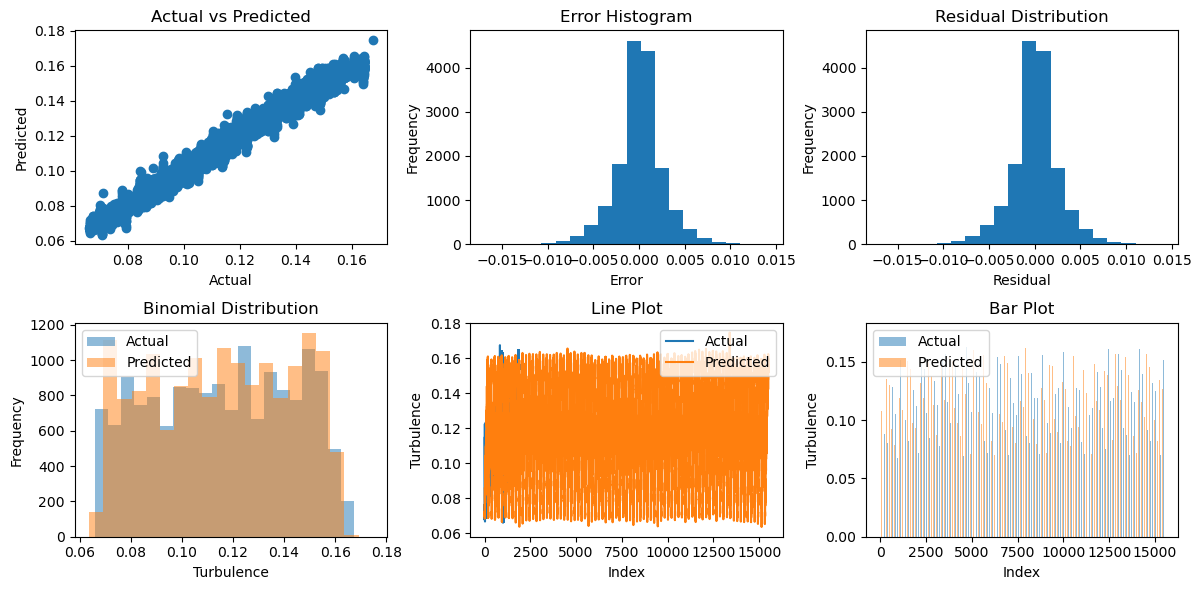

In [6]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

targets = ['wind_speed_mean', 'yaw_error_mean', 'Turbulence']

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    catboost_model = CatBoostRegressor()
    catboost_model.fit(X_train_scaled, y_train)
    
    train_predictions = catboost_model.predict(X_train_scaled)
    test_predictions = catboost_model.predict(X_test_scaled)
    
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, train_predictions)
    
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, test_predictions)
    
    print("Target Variable:", target_variable)
    print("Training MAE:", train_mae)
    print("Training MSE:", train_mse)
    print("Training RMSE:", train_rmse)
    print("Training R2:", train_r2)
    print()
    print("Test MAE:", test_mae)
    print("Test MSE:", test_mse)
    print("Test RMSE:", test_rmse)
    print("Test R2:", test_r2)
    print()
    
    # Plotting code remains the same...
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 3, 1)
    plt.scatter(y_test, test_predictions)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')

    plt.subplot(2, 3, 2)
    error = y_test - test_predictions
    plt.hist(error, bins=20)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.title('Error Histogram')

    plt.subplot(2, 3, 3)
    residual = y_test - test_predictions
    plt.hist(residual, bins=20)
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title('Residual Distribution')

    plt.subplot(2, 3, 4)
    plt.hist(y_test, bins=20, alpha=0.5, label='Actual')
    plt.hist(test_predictions, bins=20, alpha=0.5, label='Predicted')
    plt.xlabel(target_variable)
    plt.ylabel('Frequency')
    plt.title('Binomial Distribution')
    plt.legend()

    plt.subplot(2, 3, 5)
    plt.plot(y_test, label='Actual')
    plt.plot(test_predictions, label='Predicted')
    plt.xlabel('Index')
    plt.ylabel(target_variable)
    plt.title('Line Plot')
    plt.legend()

    plt.subplot(2, 3, 6)
    index = np.arange(len(y_test))
    plt.bar(index, y_test, width=0.3, alpha=0.5, label='Actual')
    plt.bar(index + 0.3, test_predictions, width=0.3, alpha=0.5, label='Predicted')
    plt.xlabel('Index')
    plt.ylabel(target_variable)
    plt.title('Bar Plot')
    plt.legend()

    plt.tight_layout()
    plt.show()


## Learning Rate (learning_rate)

0:	learn: 11.5323385	total: 21ms	remaining: 21s
1:	learn: 11.2439233	total: 41.6ms	remaining: 20.8s
2:	learn: 11.0158681	total: 61.8ms	remaining: 20.5s
3:	learn: 10.8309920	total: 80.8ms	remaining: 20.1s
4:	learn: 10.6501660	total: 101ms	remaining: 20.2s
5:	learn: 10.5006107	total: 123ms	remaining: 20.4s
6:	learn: 10.3669872	total: 144ms	remaining: 20.4s
7:	learn: 10.2204278	total: 168ms	remaining: 20.8s
8:	learn: 10.0960144	total: 191ms	remaining: 21s
9:	learn: 9.9907149	total: 210ms	remaining: 20.8s
10:	learn: 9.9082413	total: 230ms	remaining: 20.7s
11:	learn: 9.8238181	total: 256ms	remaining: 21.1s
12:	learn: 9.7584341	total: 277ms	remaining: 21s
13:	learn: 9.6875210	total: 298ms	remaining: 21s
14:	learn: 9.6364736	total: 317ms	remaining: 20.8s
15:	learn: 9.5795408	total: 339ms	remaining: 20.9s
16:	learn: 9.5182013	total: 366ms	remaining: 21.1s
17:	learn: 9.4719335	total: 390ms	remaining: 21.3s
18:	learn: 9.4249677	total: 414ms	remaining: 21.4s
19:	learn: 9.3897090	total: 438ms	rema

166:	learn: 7.1389261	total: 3.69s	remaining: 18.4s
167:	learn: 7.1312697	total: 3.71s	remaining: 18.4s
168:	learn: 7.1256513	total: 3.73s	remaining: 18.3s
169:	learn: 7.1147312	total: 3.75s	remaining: 18.3s
170:	learn: 7.1014157	total: 3.77s	remaining: 18.3s
171:	learn: 7.0951915	total: 3.79s	remaining: 18.3s
172:	learn: 7.0877602	total: 3.82s	remaining: 18.3s
173:	learn: 7.0800625	total: 3.84s	remaining: 18.2s
174:	learn: 7.0701221	total: 3.87s	remaining: 18.2s
175:	learn: 7.0629682	total: 3.89s	remaining: 18.2s
176:	learn: 7.0555442	total: 3.92s	remaining: 18.2s
177:	learn: 7.0465583	total: 3.94s	remaining: 18.2s
178:	learn: 7.0389167	total: 3.97s	remaining: 18.2s
179:	learn: 7.0361371	total: 3.99s	remaining: 18.2s
180:	learn: 7.0292463	total: 4.01s	remaining: 18.1s
181:	learn: 7.0202479	total: 4.03s	remaining: 18.1s
182:	learn: 7.0113888	total: 4.05s	remaining: 18.1s
183:	learn: 7.0062630	total: 4.07s	remaining: 18.1s
184:	learn: 6.9970139	total: 4.09s	remaining: 18s
185:	learn: 6.

330:	learn: 6.2245324	total: 7.19s	remaining: 14.5s
331:	learn: 6.2200409	total: 7.21s	remaining: 14.5s
332:	learn: 6.2154011	total: 7.24s	remaining: 14.5s
333:	learn: 6.2122343	total: 7.26s	remaining: 14.5s
334:	learn: 6.2068081	total: 7.28s	remaining: 14.4s
335:	learn: 6.2044885	total: 7.3s	remaining: 14.4s
336:	learn: 6.2009183	total: 7.32s	remaining: 14.4s
337:	learn: 6.1972801	total: 7.34s	remaining: 14.4s
338:	learn: 6.1958233	total: 7.36s	remaining: 14.3s
339:	learn: 6.1934058	total: 7.38s	remaining: 14.3s
340:	learn: 6.1892867	total: 7.4s	remaining: 14.3s
341:	learn: 6.1840796	total: 7.42s	remaining: 14.3s
342:	learn: 6.1807570	total: 7.44s	remaining: 14.3s
343:	learn: 6.1785505	total: 7.46s	remaining: 14.2s
344:	learn: 6.1747107	total: 7.48s	remaining: 14.2s
345:	learn: 6.1696945	total: 7.5s	remaining: 14.2s
346:	learn: 6.1670818	total: 7.53s	remaining: 14.2s
347:	learn: 6.1626225	total: 7.55s	remaining: 14.2s
348:	learn: 6.1585481	total: 7.57s	remaining: 14.1s
349:	learn: 6.1

492:	learn: 5.6604512	total: 10.9s	remaining: 11.3s
493:	learn: 5.6588670	total: 11s	remaining: 11.2s
494:	learn: 5.6557553	total: 11s	remaining: 11.2s
495:	learn: 5.6531062	total: 11s	remaining: 11.2s
496:	learn: 5.6505599	total: 11s	remaining: 11.2s
497:	learn: 5.6485997	total: 11.1s	remaining: 11.1s
498:	learn: 5.6459346	total: 11.1s	remaining: 11.1s
499:	learn: 5.6431341	total: 11.1s	remaining: 11.1s
500:	learn: 5.6409788	total: 11.1s	remaining: 11.1s
501:	learn: 5.6379716	total: 11.2s	remaining: 11.1s
502:	learn: 5.6350700	total: 11.2s	remaining: 11.1s
503:	learn: 5.6311930	total: 11.2s	remaining: 11s
504:	learn: 5.6283577	total: 11.2s	remaining: 11s
505:	learn: 5.6251176	total: 11.3s	remaining: 11s
506:	learn: 5.6233261	total: 11.3s	remaining: 11s
507:	learn: 5.6213923	total: 11.3s	remaining: 10.9s
508:	learn: 5.6186380	total: 11.3s	remaining: 10.9s
509:	learn: 5.6157878	total: 11.3s	remaining: 10.9s
510:	learn: 5.6119317	total: 11.4s	remaining: 10.9s
511:	learn: 5.6088106	total:

651:	learn: 5.2441147	total: 14.4s	remaining: 7.68s
652:	learn: 5.2401678	total: 14.4s	remaining: 7.66s
653:	learn: 5.2379336	total: 14.4s	remaining: 7.63s
654:	learn: 5.2364345	total: 14.4s	remaining: 7.61s
655:	learn: 5.2336403	total: 14.5s	remaining: 7.59s
656:	learn: 5.2299217	total: 14.5s	remaining: 7.57s
657:	learn: 5.2270962	total: 14.5s	remaining: 7.54s
658:	learn: 5.2240534	total: 14.5s	remaining: 7.52s
659:	learn: 5.2216640	total: 14.6s	remaining: 7.5s
660:	learn: 5.2192956	total: 14.6s	remaining: 7.48s
661:	learn: 5.2160024	total: 14.6s	remaining: 7.46s
662:	learn: 5.2141953	total: 14.6s	remaining: 7.43s
663:	learn: 5.2130245	total: 14.6s	remaining: 7.41s
664:	learn: 5.2112017	total: 14.7s	remaining: 7.39s
665:	learn: 5.2101652	total: 14.7s	remaining: 7.37s
666:	learn: 5.2085371	total: 14.7s	remaining: 7.34s
667:	learn: 5.2056275	total: 14.7s	remaining: 7.32s
668:	learn: 5.2036481	total: 14.7s	remaining: 7.3s
669:	learn: 5.2008265	total: 14.8s	remaining: 7.28s
670:	learn: 5.

815:	learn: 4.8858203	total: 17.9s	remaining: 4.03s
816:	learn: 4.8839389	total: 17.9s	remaining: 4.01s
817:	learn: 4.8817707	total: 17.9s	remaining: 3.99s
818:	learn: 4.8797703	total: 17.9s	remaining: 3.96s
819:	learn: 4.8785126	total: 18s	remaining: 3.94s
820:	learn: 4.8768511	total: 18s	remaining: 3.92s
821:	learn: 4.8753988	total: 18s	remaining: 3.9s
822:	learn: 4.8745596	total: 18s	remaining: 3.88s
823:	learn: 4.8728404	total: 18s	remaining: 3.85s
824:	learn: 4.8715001	total: 18.1s	remaining: 3.83s
825:	learn: 4.8698121	total: 18.1s	remaining: 3.81s
826:	learn: 4.8678042	total: 18.1s	remaining: 3.79s
827:	learn: 4.8660298	total: 18.1s	remaining: 3.77s
828:	learn: 4.8640759	total: 18.2s	remaining: 3.75s
829:	learn: 4.8625964	total: 18.2s	remaining: 3.72s
830:	learn: 4.8613581	total: 18.2s	remaining: 3.7s
831:	learn: 4.8595236	total: 18.2s	remaining: 3.68s
832:	learn: 4.8584113	total: 18.2s	remaining: 3.66s
833:	learn: 4.8569845	total: 18.3s	remaining: 3.63s
834:	learn: 4.8555476	to

977:	learn: 4.6107679	total: 21.5s	remaining: 485ms
978:	learn: 4.6098864	total: 21.6s	remaining: 463ms
979:	learn: 4.6077768	total: 21.6s	remaining: 441ms
980:	learn: 4.6066705	total: 21.6s	remaining: 419ms
981:	learn: 4.6051511	total: 21.6s	remaining: 397ms
982:	learn: 4.6039052	total: 21.7s	remaining: 375ms
983:	learn: 4.6010353	total: 21.7s	remaining: 352ms
984:	learn: 4.6000003	total: 21.7s	remaining: 330ms
985:	learn: 4.5986501	total: 21.7s	remaining: 308ms
986:	learn: 4.5963203	total: 21.7s	remaining: 286ms
987:	learn: 4.5934468	total: 21.8s	remaining: 265ms
988:	learn: 4.5907350	total: 21.8s	remaining: 243ms
989:	learn: 4.5885520	total: 21.8s	remaining: 220ms
990:	learn: 4.5865814	total: 21.8s	remaining: 198ms
991:	learn: 4.5854102	total: 21.9s	remaining: 176ms
992:	learn: 4.5843476	total: 21.9s	remaining: 154ms
993:	learn: 4.5828789	total: 21.9s	remaining: 132ms
994:	learn: 4.5814850	total: 21.9s	remaining: 110ms
995:	learn: 4.5793752	total: 22s	remaining: 88.2ms
996:	learn: 4

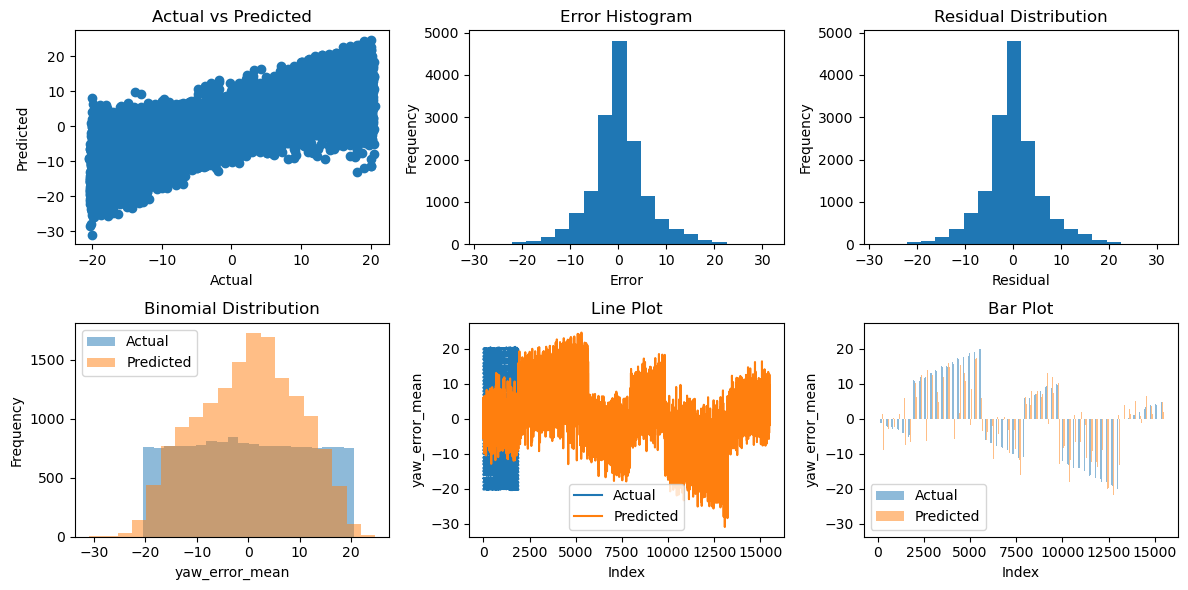

0:	learn: 11.8019769	total: 22.1ms	remaining: 22.1s
1:	learn: 11.7705066	total: 45.2ms	remaining: 22.6s
2:	learn: 11.7391347	total: 66.8ms	remaining: 22.2s
3:	learn: 11.7080301	total: 87.5ms	remaining: 21.8s
4:	learn: 11.6754815	total: 109ms	remaining: 21.6s
5:	learn: 11.6438707	total: 131ms	remaining: 21.7s
6:	learn: 11.6140257	total: 154ms	remaining: 21.8s
7:	learn: 11.5851005	total: 175ms	remaining: 21.7s
8:	learn: 11.5577819	total: 196ms	remaining: 21.5s
9:	learn: 11.5292497	total: 217ms	remaining: 21.5s
10:	learn: 11.5004367	total: 240ms	remaining: 21.6s
11:	learn: 11.4736673	total: 261ms	remaining: 21.5s
12:	learn: 11.4454678	total: 283ms	remaining: 21.5s
13:	learn: 11.4177731	total: 304ms	remaining: 21.4s
14:	learn: 11.3899269	total: 328ms	remaining: 21.5s
15:	learn: 11.3620771	total: 349ms	remaining: 21.5s
16:	learn: 11.3355841	total: 371ms	remaining: 21.5s
17:	learn: 11.3093980	total: 393ms	remaining: 21.4s
18:	learn: 11.2848951	total: 414ms	remaining: 21.4s
19:	learn: 11.2594

161:	learn: 9.5857865	total: 3.75s	remaining: 19.4s
162:	learn: 9.5787227	total: 3.78s	remaining: 19.4s
163:	learn: 9.5723588	total: 3.81s	remaining: 19.4s
164:	learn: 9.5666572	total: 3.83s	remaining: 19.4s
165:	learn: 9.5600621	total: 3.86s	remaining: 19.4s
166:	learn: 9.5539830	total: 3.89s	remaining: 19.4s
167:	learn: 9.5495101	total: 3.91s	remaining: 19.4s
168:	learn: 9.5437488	total: 3.94s	remaining: 19.4s
169:	learn: 9.5382030	total: 3.96s	remaining: 19.3s
170:	learn: 9.5326313	total: 3.99s	remaining: 19.3s
171:	learn: 9.5266283	total: 4.01s	remaining: 19.3s
172:	learn: 9.5220015	total: 4.04s	remaining: 19.3s
173:	learn: 9.5169989	total: 4.07s	remaining: 19.3s
174:	learn: 9.5116219	total: 4.09s	remaining: 19.3s
175:	learn: 9.5071797	total: 4.11s	remaining: 19.3s
176:	learn: 9.5014424	total: 4.14s	remaining: 19.3s
177:	learn: 9.4978171	total: 4.16s	remaining: 19.2s
178:	learn: 9.4939827	total: 4.18s	remaining: 19.2s
179:	learn: 9.4886319	total: 4.21s	remaining: 19.2s
180:	learn: 

320:	learn: 8.9871724	total: 7.31s	remaining: 15.5s
321:	learn: 8.9847406	total: 7.33s	remaining: 15.4s
322:	learn: 8.9823714	total: 7.35s	remaining: 15.4s
323:	learn: 8.9799793	total: 7.37s	remaining: 15.4s
324:	learn: 8.9777390	total: 7.39s	remaining: 15.4s
325:	learn: 8.9751439	total: 7.41s	remaining: 15.3s
326:	learn: 8.9720235	total: 7.43s	remaining: 15.3s
327:	learn: 8.9693911	total: 7.46s	remaining: 15.3s
328:	learn: 8.9668084	total: 7.47s	remaining: 15.2s
329:	learn: 8.9641960	total: 7.5s	remaining: 15.2s
330:	learn: 8.9616337	total: 7.52s	remaining: 15.2s
331:	learn: 8.9595110	total: 7.54s	remaining: 15.2s
332:	learn: 8.9567970	total: 7.56s	remaining: 15.1s
333:	learn: 8.9542498	total: 7.58s	remaining: 15.1s
334:	learn: 8.9519103	total: 7.6s	remaining: 15.1s
335:	learn: 8.9490556	total: 7.62s	remaining: 15.1s
336:	learn: 8.9462534	total: 7.65s	remaining: 15s
337:	learn: 8.9433158	total: 7.67s	remaining: 15s
338:	learn: 8.9403778	total: 7.69s	remaining: 15s
339:	learn: 8.937317

487:	learn: 8.5802738	total: 10.9s	remaining: 11.5s
488:	learn: 8.5780610	total: 10.9s	remaining: 11.4s
489:	learn: 8.5759557	total: 11s	remaining: 11.4s
490:	learn: 8.5735951	total: 11s	remaining: 11.4s
491:	learn: 8.5715680	total: 11s	remaining: 11.4s
492:	learn: 8.5693020	total: 11s	remaining: 11.3s
493:	learn: 8.5679134	total: 11.1s	remaining: 11.3s
494:	learn: 8.5659368	total: 11.1s	remaining: 11.3s
495:	learn: 8.5629742	total: 11.1s	remaining: 11.3s
496:	learn: 8.5614238	total: 11.1s	remaining: 11.3s
497:	learn: 8.5594791	total: 11.2s	remaining: 11.2s
498:	learn: 8.5566684	total: 11.2s	remaining: 11.2s
499:	learn: 8.5551882	total: 11.2s	remaining: 11.2s
500:	learn: 8.5526952	total: 11.2s	remaining: 11.2s
501:	learn: 8.5513679	total: 11.2s	remaining: 11.1s
502:	learn: 8.5489442	total: 11.3s	remaining: 11.1s
503:	learn: 8.5460720	total: 11.3s	remaining: 11.1s
504:	learn: 8.5430364	total: 11.3s	remaining: 11.1s
505:	learn: 8.5407048	total: 11.3s	remaining: 11.1s
506:	learn: 8.537823

651:	learn: 8.2557293	total: 14.7s	remaining: 7.85s
652:	learn: 8.2538736	total: 14.7s	remaining: 7.82s
653:	learn: 8.2519725	total: 14.8s	remaining: 7.81s
654:	learn: 8.2495553	total: 14.8s	remaining: 7.78s
655:	learn: 8.2478873	total: 14.8s	remaining: 7.76s
656:	learn: 8.2458881	total: 14.8s	remaining: 7.74s
657:	learn: 8.2444170	total: 14.8s	remaining: 7.71s
658:	learn: 8.2423773	total: 14.9s	remaining: 7.69s
659:	learn: 8.2414501	total: 14.9s	remaining: 7.66s
660:	learn: 8.2396752	total: 14.9s	remaining: 7.64s
661:	learn: 8.2385501	total: 14.9s	remaining: 7.62s
662:	learn: 8.2368059	total: 14.9s	remaining: 7.59s
663:	learn: 8.2350830	total: 15s	remaining: 7.57s
664:	learn: 8.2338139	total: 15s	remaining: 7.55s
665:	learn: 8.2321802	total: 15s	remaining: 7.52s
666:	learn: 8.2301394	total: 15s	remaining: 7.5s
667:	learn: 8.2290988	total: 15s	remaining: 7.47s
668:	learn: 8.2281965	total: 15.1s	remaining: 7.45s
669:	learn: 8.2266042	total: 15.1s	remaining: 7.43s
670:	learn: 8.2248023	t

813:	learn: 8.0029668	total: 18.1s	remaining: 4.15s
814:	learn: 8.0016317	total: 18.2s	remaining: 4.12s
815:	learn: 8.0001538	total: 18.2s	remaining: 4.1s
816:	learn: 7.9978411	total: 18.2s	remaining: 4.08s
817:	learn: 7.9962453	total: 18.2s	remaining: 4.06s
818:	learn: 7.9949100	total: 18.3s	remaining: 4.03s
819:	learn: 7.9935960	total: 18.3s	remaining: 4.01s
820:	learn: 7.9926840	total: 18.3s	remaining: 3.99s
821:	learn: 7.9914228	total: 18.3s	remaining: 3.96s
822:	learn: 7.9895582	total: 18.3s	remaining: 3.94s
823:	learn: 7.9883490	total: 18.4s	remaining: 3.92s
824:	learn: 7.9875454	total: 18.4s	remaining: 3.9s
825:	learn: 7.9860261	total: 18.4s	remaining: 3.87s
826:	learn: 7.9851559	total: 18.4s	remaining: 3.85s
827:	learn: 7.9842715	total: 18.4s	remaining: 3.83s
828:	learn: 7.9829154	total: 18.5s	remaining: 3.81s
829:	learn: 7.9815165	total: 18.5s	remaining: 3.78s
830:	learn: 7.9807239	total: 18.5s	remaining: 3.76s
831:	learn: 7.9796146	total: 18.5s	remaining: 3.74s
832:	learn: 7.

980:	learn: 7.7896429	total: 21.9s	remaining: 424ms
981:	learn: 7.7878453	total: 21.9s	remaining: 401ms
982:	learn: 7.7872066	total: 21.9s	remaining: 379ms
983:	learn: 7.7858289	total: 21.9s	remaining: 357ms
984:	learn: 7.7847057	total: 22s	remaining: 335ms
985:	learn: 7.7835831	total: 22s	remaining: 312ms
986:	learn: 7.7824678	total: 22s	remaining: 290ms
987:	learn: 7.7816501	total: 22s	remaining: 268ms
988:	learn: 7.7807226	total: 22.1s	remaining: 245ms
989:	learn: 7.7797727	total: 22.1s	remaining: 223ms
990:	learn: 7.7780443	total: 22.1s	remaining: 201ms
991:	learn: 7.7765529	total: 22.1s	remaining: 178ms
992:	learn: 7.7753977	total: 22.1s	remaining: 156ms
993:	learn: 7.7740465	total: 22.2s	remaining: 134ms
994:	learn: 7.7725227	total: 22.2s	remaining: 112ms
995:	learn: 7.7716300	total: 22.2s	remaining: 89.2ms
996:	learn: 7.7708574	total: 22.2s	remaining: 66.9ms
997:	learn: 7.7697785	total: 22.3s	remaining: 44.6ms
998:	learn: 7.7684982	total: 22.3s	remaining: 22.3ms
999:	learn: 7.76

C:\Users\musab\AppData\Local\Temp\ipykernel_16800\1545851034.py:97: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\musab\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


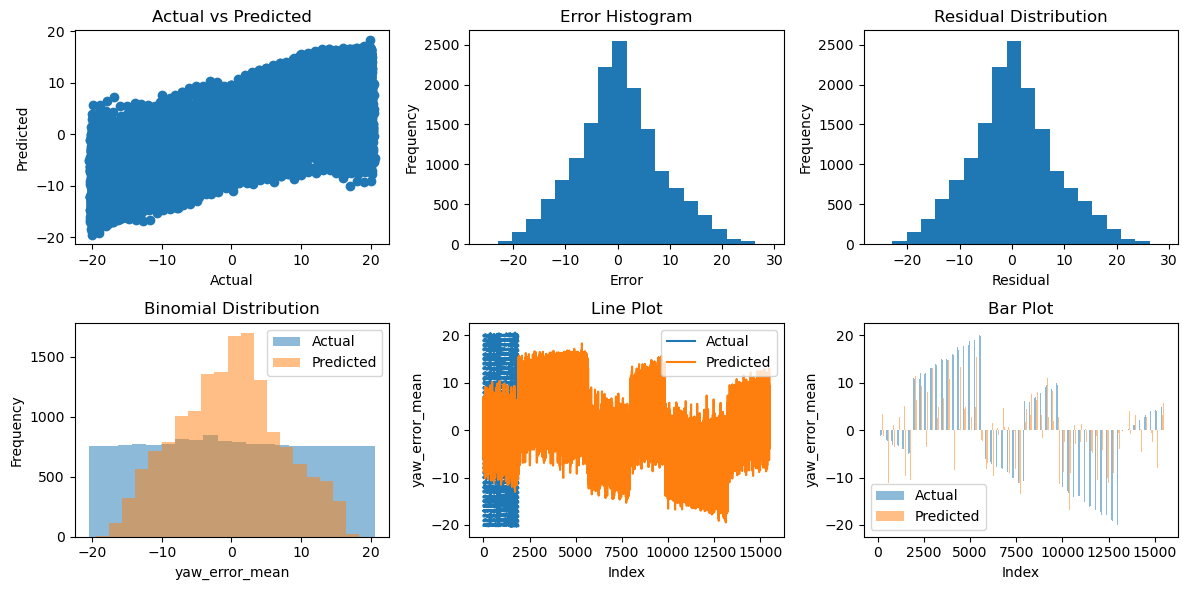

0:	learn: 11.8299937	total: 22.8ms	remaining: 22.8s
1:	learn: 11.8267932	total: 44.2ms	remaining: 22.1s
2:	learn: 11.8235555	total: 65.5ms	remaining: 21.8s
3:	learn: 11.8203000	total: 87.8ms	remaining: 21.9s
4:	learn: 11.8168616	total: 110ms	remaining: 21.8s
5:	learn: 11.8138034	total: 132ms	remaining: 21.9s
6:	learn: 11.8105517	total: 152ms	remaining: 21.5s
7:	learn: 11.8073498	total: 173ms	remaining: 21.4s
8:	learn: 11.8041288	total: 194ms	remaining: 21.4s
9:	learn: 11.8008992	total: 217ms	remaining: 21.5s
10:	learn: 11.7975969	total: 239ms	remaining: 21.5s
11:	learn: 11.7944310	total: 260ms	remaining: 21.4s
12:	learn: 11.7910955	total: 282ms	remaining: 21.4s
13:	learn: 11.7879450	total: 302ms	remaining: 21.3s
14:	learn: 11.7846036	total: 324ms	remaining: 21.3s
15:	learn: 11.7812008	total: 346ms	remaining: 21.3s
16:	learn: 11.7778754	total: 367ms	remaining: 21.2s
17:	learn: 11.7746498	total: 388ms	remaining: 21.2s
18:	learn: 11.7714604	total: 410ms	remaining: 21.2s
19:	learn: 11.7681

162:	learn: 11.3514961	total: 3.52s	remaining: 18.1s
163:	learn: 11.3490667	total: 3.54s	remaining: 18.1s
164:	learn: 11.3465119	total: 3.56s	remaining: 18s
165:	learn: 11.3437716	total: 3.58s	remaining: 18s
166:	learn: 11.3411872	total: 3.6s	remaining: 18s
167:	learn: 11.3386035	total: 3.63s	remaining: 18s
168:	learn: 11.3361218	total: 3.65s	remaining: 17.9s
169:	learn: 11.3337394	total: 3.67s	remaining: 17.9s
170:	learn: 11.3312499	total: 3.7s	remaining: 17.9s
171:	learn: 11.3286015	total: 3.72s	remaining: 17.9s
172:	learn: 11.3259467	total: 3.74s	remaining: 17.9s
173:	learn: 11.3235133	total: 3.76s	remaining: 17.9s
174:	learn: 11.3208310	total: 3.78s	remaining: 17.8s
175:	learn: 11.3181934	total: 3.8s	remaining: 17.8s
176:	learn: 11.3155650	total: 3.82s	remaining: 17.8s
177:	learn: 11.3130096	total: 3.85s	remaining: 17.8s
178:	learn: 11.3103123	total: 3.87s	remaining: 17.7s
179:	learn: 11.3077805	total: 3.89s	remaining: 17.7s
180:	learn: 11.3053204	total: 3.91s	remaining: 17.7s
181:

318:	learn: 10.9838602	total: 7.05s	remaining: 15.1s
319:	learn: 10.9818427	total: 7.08s	remaining: 15s
320:	learn: 10.9798132	total: 7.11s	remaining: 15s
321:	learn: 10.9776189	total: 7.13s	remaining: 15s
322:	learn: 10.9756195	total: 7.15s	remaining: 15s
323:	learn: 10.9736121	total: 7.18s	remaining: 15s
324:	learn: 10.9715109	total: 7.2s	remaining: 15s
325:	learn: 10.9694517	total: 7.22s	remaining: 14.9s
326:	learn: 10.9674109	total: 7.25s	remaining: 14.9s
327:	learn: 10.9652118	total: 7.27s	remaining: 14.9s
328:	learn: 10.9630187	total: 7.29s	remaining: 14.9s
329:	learn: 10.9610447	total: 7.32s	remaining: 14.9s
330:	learn: 10.9589686	total: 7.34s	remaining: 14.8s
331:	learn: 10.9568540	total: 7.36s	remaining: 14.8s
332:	learn: 10.9547111	total: 7.39s	remaining: 14.8s
333:	learn: 10.9525805	total: 7.41s	remaining: 14.8s
334:	learn: 10.9505101	total: 7.44s	remaining: 14.8s
335:	learn: 10.9484536	total: 7.46s	remaining: 14.7s
336:	learn: 10.9465844	total: 7.49s	remaining: 14.7s
337:	l

478:	learn: 10.6819287	total: 11s	remaining: 11.9s
479:	learn: 10.6804239	total: 11s	remaining: 11.9s
480:	learn: 10.6787582	total: 11s	remaining: 11.9s
481:	learn: 10.6769463	total: 11.1s	remaining: 11.9s
482:	learn: 10.6751881	total: 11.1s	remaining: 11.9s
483:	learn: 10.6734156	total: 11.1s	remaining: 11.8s
484:	learn: 10.6718290	total: 11.1s	remaining: 11.8s
485:	learn: 10.6702910	total: 11.2s	remaining: 11.8s
486:	learn: 10.6684910	total: 11.2s	remaining: 11.8s
487:	learn: 10.6669476	total: 11.2s	remaining: 11.8s
488:	learn: 10.6651611	total: 11.2s	remaining: 11.7s
489:	learn: 10.6636189	total: 11.3s	remaining: 11.7s
490:	learn: 10.6620328	total: 11.3s	remaining: 11.7s
491:	learn: 10.6603027	total: 11.3s	remaining: 11.7s
492:	learn: 10.6584803	total: 11.3s	remaining: 11.7s
493:	learn: 10.6568710	total: 11.4s	remaining: 11.6s
494:	learn: 10.6551664	total: 11.4s	remaining: 11.6s
495:	learn: 10.6536179	total: 11.4s	remaining: 11.6s
496:	learn: 10.6520003	total: 11.4s	remaining: 11.6s

634:	learn: 10.4411524	total: 14.9s	remaining: 8.56s
635:	learn: 10.4395732	total: 14.9s	remaining: 8.54s
636:	learn: 10.4382389	total: 14.9s	remaining: 8.52s
637:	learn: 10.4369525	total: 15s	remaining: 8.49s
638:	learn: 10.4356583	total: 15s	remaining: 8.47s
639:	learn: 10.4343369	total: 15s	remaining: 8.44s
640:	learn: 10.4328747	total: 15s	remaining: 8.42s
641:	learn: 10.4314717	total: 15.1s	remaining: 8.4s
642:	learn: 10.4299234	total: 15.1s	remaining: 8.37s
643:	learn: 10.4285141	total: 15.1s	remaining: 8.35s
644:	learn: 10.4271478	total: 15.1s	remaining: 8.33s
645:	learn: 10.4257209	total: 15.2s	remaining: 8.3s
646:	learn: 10.4244758	total: 15.2s	remaining: 8.28s
647:	learn: 10.4229766	total: 15.2s	remaining: 8.26s
648:	learn: 10.4215520	total: 15.2s	remaining: 8.23s
649:	learn: 10.4201430	total: 15.2s	remaining: 8.21s
650:	learn: 10.4188948	total: 15.3s	remaining: 8.18s
651:	learn: 10.4173998	total: 15.3s	remaining: 8.16s
652:	learn: 10.4159884	total: 15.3s	remaining: 8.14s
653

790:	learn: 10.2424016	total: 18.4s	remaining: 4.86s
791:	learn: 10.2413627	total: 18.4s	remaining: 4.84s
792:	learn: 10.2401558	total: 18.4s	remaining: 4.82s
793:	learn: 10.2389685	total: 18.5s	remaining: 4.79s
794:	learn: 10.2376225	total: 18.5s	remaining: 4.77s
795:	learn: 10.2365325	total: 18.5s	remaining: 4.74s
796:	learn: 10.2354629	total: 18.5s	remaining: 4.72s
797:	learn: 10.2343206	total: 18.6s	remaining: 4.7s
798:	learn: 10.2330047	total: 18.6s	remaining: 4.67s
799:	learn: 10.2318678	total: 18.6s	remaining: 4.65s
800:	learn: 10.2308073	total: 18.6s	remaining: 4.63s
801:	learn: 10.2297082	total: 18.6s	remaining: 4.6s
802:	learn: 10.2286595	total: 18.7s	remaining: 4.58s
803:	learn: 10.2276444	total: 18.7s	remaining: 4.55s
804:	learn: 10.2263371	total: 18.7s	remaining: 4.53s
805:	learn: 10.2253325	total: 18.7s	remaining: 4.51s
806:	learn: 10.2242714	total: 18.7s	remaining: 4.48s
807:	learn: 10.2230500	total: 18.8s	remaining: 4.46s
808:	learn: 10.2217938	total: 18.8s	remaining: 4

947:	learn: 10.0757575	total: 21.9s	remaining: 1.2s
948:	learn: 10.0748429	total: 21.9s	remaining: 1.18s
949:	learn: 10.0739912	total: 22s	remaining: 1.16s
950:	learn: 10.0728432	total: 22s	remaining: 1.13s
951:	learn: 10.0720077	total: 22s	remaining: 1.11s
952:	learn: 10.0710689	total: 22s	remaining: 1.09s
953:	learn: 10.0699843	total: 22s	remaining: 1.06s
954:	learn: 10.0690627	total: 22.1s	remaining: 1.04s
955:	learn: 10.0679564	total: 22.1s	remaining: 1.02s
956:	learn: 10.0669723	total: 22.1s	remaining: 994ms
957:	learn: 10.0659175	total: 22.1s	remaining: 971ms
958:	learn: 10.0649906	total: 22.2s	remaining: 948ms
959:	learn: 10.0640476	total: 22.2s	remaining: 925ms
960:	learn: 10.0631656	total: 22.2s	remaining: 902ms
961:	learn: 10.0623304	total: 22.2s	remaining: 879ms
962:	learn: 10.0614981	total: 22.3s	remaining: 855ms
963:	learn: 10.0603851	total: 22.3s	remaining: 832ms
964:	learn: 10.0592871	total: 22.3s	remaining: 809ms
965:	learn: 10.0584033	total: 22.3s	remaining: 786ms
966:

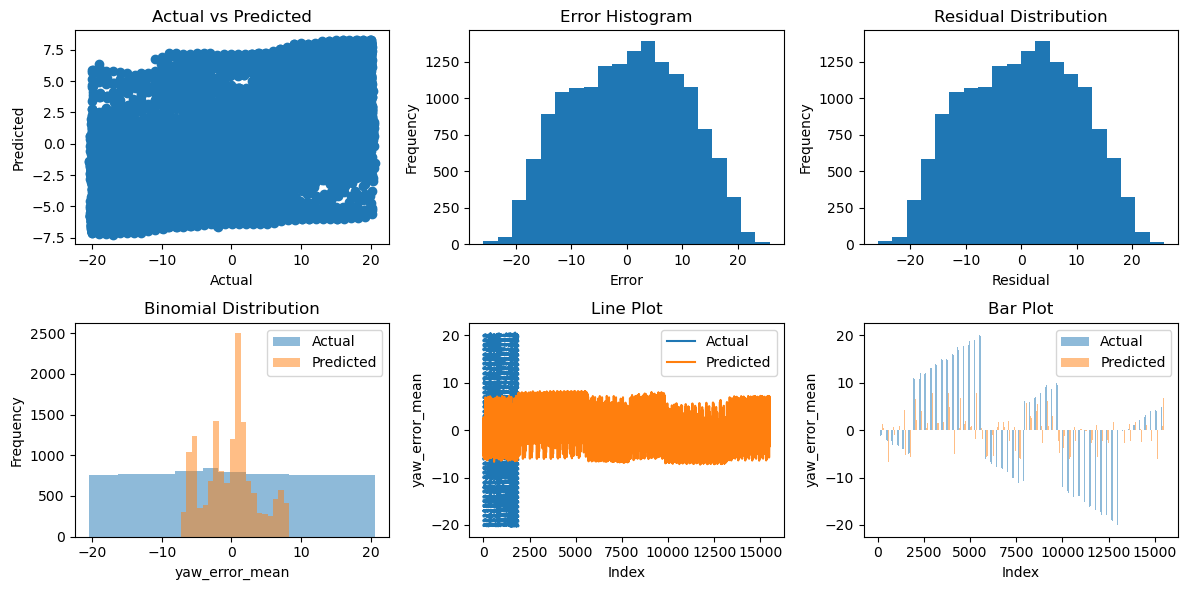

In [9]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

targets = ['yaw_error_mean']

learning_rates = [0.1, 0.01, 0.001]  # List of learning rates to try

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for learning_rate in learning_rates:
        catboost_model = CatBoostRegressor(learning_rate=learning_rate)
        catboost_model.fit(X_train_scaled, y_train)
        
        train_predictions = catboost_model.predict(X_train_scaled)
        test_predictions = catboost_model.predict(X_test_scaled)
        
        train_mae = mean_absolute_error(y_train, train_predictions)
        train_mse = mean_squared_error(y_train, train_predictions)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, train_predictions)
        
        test_mae = mean_absolute_error(y_test, test_predictions)
        test_mse = mean_squared_error(y_test, test_predictions)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, test_predictions)
        
        print("Target Variable:", target_variable)
        print("Learning Rate:", learning_rate)
        print("Training MAE:", train_mae)
        print("Training MSE:", train_mse)
        print("Training RMSE:", train_rmse)
        print("Training R2:", train_r2)
        print()
        print("Test MAE:", test_mae)
        print("Test MSE:", test_mse)
        print("Test RMSE:", test_rmse)
        print("Test R2:", test_r2)
        print()
        
        # Plotting code remains the same...
        plt.figure(figsize=(12, 6))

        plt.subplot(2, 3, 1)
        plt.scatter(y_test, test_predictions)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Actual vs Predicted')

        plt.subplot(2, 3, 2)
        error = y_test - test_predictions
        plt.hist(error, bins=20)
        plt.xlabel('Error')
        plt.ylabel('Frequency')
        plt.title('Error Histogram')

        plt.subplot(2, 3, 3)
        residual = y_test - test_predictions
        plt.hist(residual, bins=20)
        plt.xlabel('Residual')
        plt.ylabel('Frequency')
        plt.title('Residual Distribution')

        plt.subplot(2, 3, 4)
        plt.hist(y_test, bins=20, alpha=0.5, label='Actual')
        plt.hist(test_predictions, bins=20, alpha=0.5, label='Predicted')
        plt.xlabel(target_variable)
        plt.ylabel('Frequency')
        plt.title('Binomial Distribution')
        plt.legend()

        plt.subplot(2, 3, 5)
        plt.plot(y_test, label='Actual')
        plt.plot(test_predictions, label='Predicted')
        plt.xlabel('Index')
        plt.ylabel(target_variable)
        plt.title('Line Plot')
        plt.legend()

        plt.subplot(2, 3, 6)
        index = np.arange(len(y_test))
        plt.bar(index, y_test, width=0.3, alpha=0.5, label='Actual')
        plt.bar(index + 0.3, test_predictions, width=0.3, alpha=0.5, label='Predicted')
        plt.xlabel('Index')
        plt.ylabel(target_variable)
        plt.title('Bar Plot')
        plt.legend()

        plt.tight_layout()
        plt.show()


## Batch Size (batch_size)

In [12]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

targets = ['yaw_error_mean']
iterations_list = [500, 1000, 1500]  # List of iterations values to try

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for iterations in iterations_list:
        catboost_model = CatBoostRegressor(iterations=iterations)
        catboost_model.fit(X_train_scaled, y_train)
        
        train_predictions = catboost_model.predict(X_train_scaled)
        test_predictions = catboost_model.predict(X_test_scaled)
        
        train_mae = mean_absolute_error(y_train, train_predictions)
        train_mse = mean_squared_error(y_train, train_predictions)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, train_predictions)
        
        test_mae = mean_absolute_error(y_test, test_predictions)
        test_mse = mean_squared_error(y_test, test_predictions)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, test_predictions)
        
        print("Target Variable:", target_variable)
        print("Iterations:", iterations)
        print("Training MAE:", train_mae)
        print("Training MSE:", train_mse)
        print("Training RMSE:", train_rmse)
        print("Training R2:", train_r2)
        print()
        print("Test MAE:", test_mae)
        print("Test MSE:", test_mse)
        print("Test RMSE:", test_rmse)
        print("Test R2:", test_r2)
        print()
        
        # Plotting code remains the same...


Learning rate set to 0.138101
0:	learn: 11.4241627	total: 22.3ms	remaining: 11.1s
1:	learn: 11.0522520	total: 42.5ms	remaining: 10.6s
2:	learn: 10.7778565	total: 62.7ms	remaining: 10.4s
3:	learn: 10.5649007	total: 82ms	remaining: 10.2s
4:	learn: 10.3723595	total: 103ms	remaining: 10.2s
5:	learn: 10.2022435	total: 125ms	remaining: 10.3s
6:	learn: 10.0533495	total: 148ms	remaining: 10.4s
7:	learn: 9.9381407	total: 167ms	remaining: 10.3s
8:	learn: 9.8100752	total: 188ms	remaining: 10.3s
9:	learn: 9.7191554	total: 212ms	remaining: 10.4s
10:	learn: 9.6232215	total: 232ms	remaining: 10.3s
11:	learn: 9.5346643	total: 253ms	remaining: 10.3s
12:	learn: 9.4731068	total: 273ms	remaining: 10.2s
13:	learn: 9.3999087	total: 292ms	remaining: 10.1s
14:	learn: 9.3289142	total: 314ms	remaining: 10.1s
15:	learn: 9.2759483	total: 333ms	remaining: 10.1s
16:	learn: 9.2248498	total: 354ms	remaining: 10s
17:	learn: 9.1863221	total: 373ms	remaining: 9.98s
18:	learn: 9.1422710	total: 391ms	remaining: 9.91s
19:	

163:	learn: 6.7296102	total: 3.48s	remaining: 7.13s
164:	learn: 6.7196556	total: 3.5s	remaining: 7.11s
165:	learn: 6.7171638	total: 3.52s	remaining: 7.08s
166:	learn: 6.7106141	total: 3.54s	remaining: 7.06s
167:	learn: 6.6986395	total: 3.56s	remaining: 7.04s
168:	learn: 6.6931217	total: 3.58s	remaining: 7.01s
169:	learn: 6.6848224	total: 3.6s	remaining: 6.99s
170:	learn: 6.6788597	total: 3.62s	remaining: 6.97s
171:	learn: 6.6700549	total: 3.64s	remaining: 6.95s
172:	learn: 6.6626068	total: 3.66s	remaining: 6.92s
173:	learn: 6.6556079	total: 3.68s	remaining: 6.89s
174:	learn: 6.6471392	total: 3.7s	remaining: 6.88s
175:	learn: 6.6420133	total: 3.72s	remaining: 6.85s
176:	learn: 6.6364187	total: 3.74s	remaining: 6.82s
177:	learn: 6.6283485	total: 3.76s	remaining: 6.8s
178:	learn: 6.6198750	total: 3.78s	remaining: 6.78s
179:	learn: 6.6122594	total: 3.8s	remaining: 6.76s
180:	learn: 6.6053940	total: 3.83s	remaining: 6.75s
181:	learn: 6.5979710	total: 3.85s	remaining: 6.72s
182:	learn: 6.589

325:	learn: 5.8177134	total: 6.98s	remaining: 3.73s
326:	learn: 5.8136279	total: 7s	remaining: 3.71s
327:	learn: 5.8099492	total: 7.02s	remaining: 3.68s
328:	learn: 5.8076088	total: 7.05s	remaining: 3.66s
329:	learn: 5.8011583	total: 7.07s	remaining: 3.64s
330:	learn: 5.7965739	total: 7.09s	remaining: 3.62s
331:	learn: 5.7906900	total: 7.11s	remaining: 3.6s
332:	learn: 5.7861849	total: 7.13s	remaining: 3.58s
333:	learn: 5.7817086	total: 7.15s	remaining: 3.55s
334:	learn: 5.7764188	total: 7.17s	remaining: 3.53s
335:	learn: 5.7718139	total: 7.19s	remaining: 3.51s
336:	learn: 5.7681661	total: 7.21s	remaining: 3.49s
337:	learn: 5.7658088	total: 7.23s	remaining: 3.46s
338:	learn: 5.7598576	total: 7.25s	remaining: 3.44s
339:	learn: 5.7569808	total: 7.27s	remaining: 3.42s
340:	learn: 5.7527333	total: 7.29s	remaining: 3.4s
341:	learn: 5.7479259	total: 7.31s	remaining: 3.38s
342:	learn: 5.7441411	total: 7.33s	remaining: 3.36s
343:	learn: 5.7410124	total: 7.35s	remaining: 3.33s
344:	learn: 5.737

486:	learn: 5.2207453	total: 10.5s	remaining: 279ms
487:	learn: 5.2179697	total: 10.5s	remaining: 258ms
488:	learn: 5.2141921	total: 10.5s	remaining: 236ms
489:	learn: 5.2116598	total: 10.5s	remaining: 215ms
490:	learn: 5.2078606	total: 10.6s	remaining: 194ms
491:	learn: 5.2059740	total: 10.6s	remaining: 172ms
492:	learn: 5.2036300	total: 10.6s	remaining: 151ms
493:	learn: 5.2006004	total: 10.6s	remaining: 129ms
494:	learn: 5.1975183	total: 10.6s	remaining: 108ms
495:	learn: 5.1948894	total: 10.7s	remaining: 86ms
496:	learn: 5.1922314	total: 10.7s	remaining: 64.5ms
497:	learn: 5.1887260	total: 10.7s	remaining: 43ms
498:	learn: 5.1859512	total: 10.7s	remaining: 21.5ms
499:	learn: 5.1838552	total: 10.8s	remaining: 0us
Target Variable: yaw_error_mean
Iterations: 500
Training MAE: 3.602403177728907
Training MSE: 26.872354628386994
Training RMSE: 5.1838551897585825
Training R2: 0.8080857080986157

Test MAE: 4.514587439538906
Test MSE: 39.82887522591266
Test RMSE: 6.311012218805527
Test R2: 

146:	learn: 7.5946219	total: 3.02s	remaining: 17.5s
147:	learn: 7.5902344	total: 3.03s	remaining: 17.5s
148:	learn: 7.5781440	total: 3.05s	remaining: 17.4s
149:	learn: 7.5674360	total: 3.07s	remaining: 17.4s
150:	learn: 7.5603982	total: 3.09s	remaining: 17.4s
151:	learn: 7.5551244	total: 3.11s	remaining: 17.4s
152:	learn: 7.5501061	total: 3.13s	remaining: 17.3s
153:	learn: 7.5419711	total: 3.15s	remaining: 17.3s
154:	learn: 7.5382097	total: 3.17s	remaining: 17.3s
155:	learn: 7.5309709	total: 3.19s	remaining: 17.3s
156:	learn: 7.5219480	total: 3.22s	remaining: 17.3s
157:	learn: 7.5124244	total: 3.24s	remaining: 17.3s
158:	learn: 7.5080869	total: 3.26s	remaining: 17.3s
159:	learn: 7.5022339	total: 3.28s	remaining: 17.2s
160:	learn: 7.4945584	total: 3.3s	remaining: 17.2s
161:	learn: 7.4860277	total: 3.32s	remaining: 17.2s
162:	learn: 7.4779248	total: 3.35s	remaining: 17.2s
163:	learn: 7.4670059	total: 3.36s	remaining: 17.2s
164:	learn: 7.4594036	total: 3.39s	remaining: 17.1s
165:	learn: 7

313:	learn: 6.6249950	total: 6.68s	remaining: 14.6s
314:	learn: 6.6216872	total: 6.7s	remaining: 14.6s
315:	learn: 6.6175250	total: 6.72s	remaining: 14.5s
316:	learn: 6.6129326	total: 6.74s	remaining: 14.5s
317:	learn: 6.6090348	total: 6.77s	remaining: 14.5s
318:	learn: 6.6046392	total: 6.79s	remaining: 14.5s
319:	learn: 6.6011962	total: 6.81s	remaining: 14.5s
320:	learn: 6.5968556	total: 6.83s	remaining: 14.4s
321:	learn: 6.5934209	total: 6.85s	remaining: 14.4s
322:	learn: 6.5903742	total: 6.87s	remaining: 14.4s
323:	learn: 6.5877477	total: 6.89s	remaining: 14.4s
324:	learn: 6.5833870	total: 6.91s	remaining: 14.4s
325:	learn: 6.5788912	total: 6.93s	remaining: 14.3s
326:	learn: 6.5735328	total: 6.96s	remaining: 14.3s
327:	learn: 6.5677202	total: 6.98s	remaining: 14.3s
328:	learn: 6.5644013	total: 7s	remaining: 14.3s
329:	learn: 6.5619549	total: 7.02s	remaining: 14.2s
330:	learn: 6.5572022	total: 7.04s	remaining: 14.2s
331:	learn: 6.5535399	total: 7.06s	remaining: 14.2s
332:	learn: 6.54

477:	learn: 6.0501024	total: 10.6s	remaining: 11.5s
478:	learn: 6.0475625	total: 10.6s	remaining: 11.5s
479:	learn: 6.0446091	total: 10.6s	remaining: 11.5s
480:	learn: 6.0417565	total: 10.6s	remaining: 11.5s
481:	learn: 6.0391974	total: 10.7s	remaining: 11.4s
482:	learn: 6.0369699	total: 10.7s	remaining: 11.4s
483:	learn: 6.0336173	total: 10.7s	remaining: 11.4s
484:	learn: 6.0304094	total: 10.7s	remaining: 11.4s
485:	learn: 6.0284548	total: 10.7s	remaining: 11.3s
486:	learn: 6.0255161	total: 10.8s	remaining: 11.3s
487:	learn: 6.0228848	total: 10.8s	remaining: 11.3s
488:	learn: 6.0192649	total: 10.8s	remaining: 11.3s
489:	learn: 6.0168412	total: 10.8s	remaining: 11.3s
490:	learn: 6.0128435	total: 10.8s	remaining: 11.2s
491:	learn: 6.0076925	total: 10.9s	remaining: 11.2s
492:	learn: 6.0054738	total: 10.9s	remaining: 11.2s
493:	learn: 6.0036928	total: 10.9s	remaining: 11.2s
494:	learn: 6.0002768	total: 10.9s	remaining: 11.1s
495:	learn: 5.9960820	total: 10.9s	remaining: 11.1s
496:	learn: 

641:	learn: 5.6114493	total: 14.1s	remaining: 7.83s
642:	learn: 5.6087252	total: 14.1s	remaining: 7.81s
643:	learn: 5.6060263	total: 14.1s	remaining: 7.79s
644:	learn: 5.6033215	total: 14.1s	remaining: 7.77s
645:	learn: 5.6012352	total: 14.1s	remaining: 7.75s
646:	learn: 5.5991441	total: 14.2s	remaining: 7.72s
647:	learn: 5.5971473	total: 14.2s	remaining: 7.7s
648:	learn: 5.5952941	total: 14.2s	remaining: 7.68s
649:	learn: 5.5932753	total: 14.2s	remaining: 7.66s
650:	learn: 5.5903075	total: 14.2s	remaining: 7.63s
651:	learn: 5.5860678	total: 14.3s	remaining: 7.61s
652:	learn: 5.5843220	total: 14.3s	remaining: 7.59s
653:	learn: 5.5815040	total: 14.3s	remaining: 7.57s
654:	learn: 5.5799757	total: 14.3s	remaining: 7.54s
655:	learn: 5.5776710	total: 14.3s	remaining: 7.52s
656:	learn: 5.5740904	total: 14.4s	remaining: 7.5s
657:	learn: 5.5716561	total: 14.4s	remaining: 7.48s
658:	learn: 5.5694294	total: 14.4s	remaining: 7.46s
659:	learn: 5.5671705	total: 14.4s	remaining: 7.43s
660:	learn: 5.

802:	learn: 5.2747392	total: 17.6s	remaining: 4.31s
803:	learn: 5.2730571	total: 17.6s	remaining: 4.29s
804:	learn: 5.2722229	total: 17.6s	remaining: 4.26s
805:	learn: 5.2710623	total: 17.6s	remaining: 4.24s
806:	learn: 5.2695580	total: 17.6s	remaining: 4.22s
807:	learn: 5.2672277	total: 17.7s	remaining: 4.2s
808:	learn: 5.2640836	total: 17.7s	remaining: 4.17s
809:	learn: 5.2620515	total: 17.7s	remaining: 4.15s
810:	learn: 5.2611313	total: 17.7s	remaining: 4.13s
811:	learn: 5.2598565	total: 17.7s	remaining: 4.11s
812:	learn: 5.2578397	total: 17.8s	remaining: 4.08s
813:	learn: 5.2545255	total: 17.8s	remaining: 4.06s
814:	learn: 5.2525014	total: 17.8s	remaining: 4.04s
815:	learn: 5.2502412	total: 17.8s	remaining: 4.02s
816:	learn: 5.2473588	total: 17.9s	remaining: 4s
817:	learn: 5.2457280	total: 17.9s	remaining: 3.98s
818:	learn: 5.2435528	total: 17.9s	remaining: 3.95s
819:	learn: 5.2423063	total: 17.9s	remaining: 3.93s
820:	learn: 5.2408027	total: 17.9s	remaining: 3.91s
821:	learn: 5.23

961:	learn: 4.9989886	total: 21s	remaining: 831ms
962:	learn: 4.9966454	total: 21.1s	remaining: 810ms
963:	learn: 4.9949020	total: 21.1s	remaining: 788ms
964:	learn: 4.9930208	total: 21.1s	remaining: 766ms
965:	learn: 4.9910617	total: 21.1s	remaining: 744ms
966:	learn: 4.9900925	total: 21.2s	remaining: 722ms
967:	learn: 4.9887357	total: 21.2s	remaining: 700ms
968:	learn: 4.9875610	total: 21.2s	remaining: 678ms
969:	learn: 4.9864236	total: 21.2s	remaining: 656ms
970:	learn: 4.9850790	total: 21.2s	remaining: 634ms
971:	learn: 4.9838237	total: 21.3s	remaining: 613ms
972:	learn: 4.9819288	total: 21.3s	remaining: 591ms
973:	learn: 4.9806306	total: 21.3s	remaining: 569ms
974:	learn: 4.9782725	total: 21.3s	remaining: 547ms
975:	learn: 4.9765172	total: 21.4s	remaining: 525ms
976:	learn: 4.9750099	total: 21.4s	remaining: 503ms
977:	learn: 4.9735156	total: 21.4s	remaining: 481ms
978:	learn: 4.9710526	total: 21.4s	remaining: 459ms
979:	learn: 4.9705187	total: 21.4s	remaining: 437ms
980:	learn: 4.

118:	learn: 8.2087457	total: 2.87s	remaining: 33.3s
119:	learn: 8.2010085	total: 2.89s	remaining: 33.3s
120:	learn: 8.1921591	total: 2.92s	remaining: 33.2s
121:	learn: 8.1825737	total: 2.94s	remaining: 33.2s
122:	learn: 8.1709493	total: 2.97s	remaining: 33.2s
123:	learn: 8.1596507	total: 3s	remaining: 33.3s
124:	learn: 8.1452001	total: 3.03s	remaining: 33.4s
125:	learn: 8.1374946	total: 3.06s	remaining: 33.4s
126:	learn: 8.1290106	total: 3.09s	remaining: 33.4s
127:	learn: 8.1202769	total: 3.11s	remaining: 33.4s
128:	learn: 8.1095105	total: 3.14s	remaining: 33.4s
129:	learn: 8.0984149	total: 3.17s	remaining: 33.4s
130:	learn: 8.0896746	total: 3.19s	remaining: 33.4s
131:	learn: 8.0754660	total: 3.22s	remaining: 33.4s
132:	learn: 8.0669752	total: 3.24s	remaining: 33.3s
133:	learn: 8.0596023	total: 3.27s	remaining: 33.3s
134:	learn: 8.0542122	total: 3.29s	remaining: 33.3s
135:	learn: 8.0490739	total: 3.31s	remaining: 33.2s
136:	learn: 8.0436757	total: 3.33s	remaining: 33.2s
137:	learn: 8.0

280:	learn: 7.1959160	total: 6.89s	remaining: 29.9s
281:	learn: 7.1913554	total: 6.92s	remaining: 29.9s
282:	learn: 7.1864507	total: 6.94s	remaining: 29.9s
283:	learn: 7.1823107	total: 6.96s	remaining: 29.8s
284:	learn: 7.1773765	total: 6.99s	remaining: 29.8s
285:	learn: 7.1741295	total: 7.01s	remaining: 29.8s
286:	learn: 7.1701319	total: 7.04s	remaining: 29.7s
287:	learn: 7.1655304	total: 7.06s	remaining: 29.7s
288:	learn: 7.1618988	total: 7.08s	remaining: 29.7s
289:	learn: 7.1576599	total: 7.1s	remaining: 29.6s
290:	learn: 7.1521169	total: 7.12s	remaining: 29.6s
291:	learn: 7.1461009	total: 7.15s	remaining: 29.6s
292:	learn: 7.1425286	total: 7.17s	remaining: 29.5s
293:	learn: 7.1380076	total: 7.19s	remaining: 29.5s
294:	learn: 7.1308998	total: 7.21s	remaining: 29.5s
295:	learn: 7.1265181	total: 7.24s	remaining: 29.4s
296:	learn: 7.1244664	total: 7.25s	remaining: 29.4s
297:	learn: 7.1210188	total: 7.27s	remaining: 29.3s
298:	learn: 7.1156502	total: 7.3s	remaining: 29.3s
299:	learn: 7.

443:	learn: 6.5877027	total: 10.6s	remaining: 25.2s
444:	learn: 6.5845174	total: 10.6s	remaining: 25.1s
445:	learn: 6.5820939	total: 10.6s	remaining: 25.1s
446:	learn: 6.5794763	total: 10.7s	remaining: 25.1s
447:	learn: 6.5755190	total: 10.7s	remaining: 25.1s
448:	learn: 6.5714616	total: 10.7s	remaining: 25.1s
449:	learn: 6.5668048	total: 10.7s	remaining: 25.1s
450:	learn: 6.5644107	total: 10.8s	remaining: 25s
451:	learn: 6.5603745	total: 10.8s	remaining: 25s
452:	learn: 6.5591860	total: 10.8s	remaining: 25s
453:	learn: 6.5565862	total: 10.8s	remaining: 25s
454:	learn: 6.5541727	total: 10.9s	remaining: 24.9s
455:	learn: 6.5514440	total: 10.9s	remaining: 24.9s
456:	learn: 6.5495478	total: 10.9s	remaining: 24.9s
457:	learn: 6.5467121	total: 10.9s	remaining: 24.8s
458:	learn: 6.5445947	total: 10.9s	remaining: 24.8s
459:	learn: 6.5408946	total: 11s	remaining: 24.8s
460:	learn: 6.5386379	total: 11s	remaining: 24.8s
461:	learn: 6.5351921	total: 11s	remaining: 24.7s
462:	learn: 6.5320554	tota

607:	learn: 6.1630873	total: 14s	remaining: 20.6s
608:	learn: 6.1611755	total: 14.1s	remaining: 20.6s
609:	learn: 6.1585229	total: 14.1s	remaining: 20.5s
610:	learn: 6.1566163	total: 14.1s	remaining: 20.5s
611:	learn: 6.1550762	total: 14.1s	remaining: 20.5s
612:	learn: 6.1529000	total: 14.2s	remaining: 20.5s
613:	learn: 6.1506586	total: 14.2s	remaining: 20.5s
614:	learn: 6.1473895	total: 14.2s	remaining: 20.4s
615:	learn: 6.1458635	total: 14.2s	remaining: 20.4s
616:	learn: 6.1441591	total: 14.2s	remaining: 20.4s
617:	learn: 6.1420607	total: 14.3s	remaining: 20.4s
618:	learn: 6.1391713	total: 14.3s	remaining: 20.3s
619:	learn: 6.1365612	total: 14.3s	remaining: 20.3s
620:	learn: 6.1335839	total: 14.3s	remaining: 20.3s
621:	learn: 6.1303365	total: 14.3s	remaining: 20.3s
622:	learn: 6.1267670	total: 14.4s	remaining: 20.2s
623:	learn: 6.1238063	total: 14.4s	remaining: 20.2s
624:	learn: 6.1207293	total: 14.4s	remaining: 20.2s
625:	learn: 6.1186221	total: 14.4s	remaining: 20.2s
626:	learn: 6.

768:	learn: 5.8346539	total: 17.5s	remaining: 16.7s
769:	learn: 5.8332323	total: 17.6s	remaining: 16.6s
770:	learn: 5.8315389	total: 17.6s	remaining: 16.6s
771:	learn: 5.8291722	total: 17.6s	remaining: 16.6s
772:	learn: 5.8270318	total: 17.6s	remaining: 16.6s
773:	learn: 5.8245783	total: 17.6s	remaining: 16.5s
774:	learn: 5.8220094	total: 17.7s	remaining: 16.5s
775:	learn: 5.8212821	total: 17.7s	remaining: 16.5s
776:	learn: 5.8195580	total: 17.7s	remaining: 16.5s
777:	learn: 5.8179416	total: 17.7s	remaining: 16.5s
778:	learn: 5.8156002	total: 17.8s	remaining: 16.4s
779:	learn: 5.8144284	total: 17.8s	remaining: 16.4s
780:	learn: 5.8114781	total: 17.8s	remaining: 16.4s
781:	learn: 5.8099553	total: 17.8s	remaining: 16.4s
782:	learn: 5.8085170	total: 17.8s	remaining: 16.3s
783:	learn: 5.8069461	total: 17.9s	remaining: 16.3s
784:	learn: 5.8048877	total: 17.9s	remaining: 16.3s
785:	learn: 5.8027011	total: 17.9s	remaining: 16.3s
786:	learn: 5.8014784	total: 17.9s	remaining: 16.2s
787:	learn: 

933:	learn: 5.5460332	total: 21.1s	remaining: 12.8s
934:	learn: 5.5433441	total: 21.2s	remaining: 12.8s
935:	learn: 5.5415491	total: 21.2s	remaining: 12.8s
936:	learn: 5.5401475	total: 21.2s	remaining: 12.7s
937:	learn: 5.5383427	total: 21.2s	remaining: 12.7s
938:	learn: 5.5374049	total: 21.2s	remaining: 12.7s
939:	learn: 5.5361725	total: 21.3s	remaining: 12.7s
940:	learn: 5.5339523	total: 21.3s	remaining: 12.6s
941:	learn: 5.5314070	total: 21.3s	remaining: 12.6s
942:	learn: 5.5301820	total: 21.3s	remaining: 12.6s
943:	learn: 5.5280450	total: 21.4s	remaining: 12.6s
944:	learn: 5.5264760	total: 21.4s	remaining: 12.6s
945:	learn: 5.5248587	total: 21.4s	remaining: 12.5s
946:	learn: 5.5241685	total: 21.4s	remaining: 12.5s
947:	learn: 5.5216461	total: 21.4s	remaining: 12.5s
948:	learn: 5.5202973	total: 21.5s	remaining: 12.5s
949:	learn: 5.5187460	total: 21.5s	remaining: 12.4s
950:	learn: 5.5170477	total: 21.5s	remaining: 12.4s
951:	learn: 5.5143748	total: 21.5s	remaining: 12.4s
952:	learn: 

1096:	learn: 5.2981498	total: 24.6s	remaining: 9.04s
1097:	learn: 5.2967785	total: 24.6s	remaining: 9.01s
1098:	learn: 5.2955984	total: 24.6s	remaining: 8.99s
1099:	learn: 5.2946474	total: 24.7s	remaining: 8.97s
1100:	learn: 5.2938791	total: 24.7s	remaining: 8.94s
1101:	learn: 5.2924140	total: 24.7s	remaining: 8.92s
1102:	learn: 5.2909796	total: 24.7s	remaining: 8.9s
1103:	learn: 5.2889612	total: 24.8s	remaining: 8.88s
1104:	learn: 5.2878095	total: 24.8s	remaining: 8.85s
1105:	learn: 5.2871705	total: 24.8s	remaining: 8.83s
1106:	learn: 5.2865022	total: 24.8s	remaining: 8.81s
1107:	learn: 5.2860655	total: 24.8s	remaining: 8.79s
1108:	learn: 5.2849756	total: 24.9s	remaining: 8.76s
1109:	learn: 5.2838302	total: 24.9s	remaining: 8.74s
1110:	learn: 5.2829129	total: 24.9s	remaining: 8.72s
1111:	learn: 5.2823926	total: 24.9s	remaining: 8.7s
1112:	learn: 5.2811060	total: 24.9s	remaining: 8.67s
1113:	learn: 5.2802306	total: 25s	remaining: 8.65s
1114:	learn: 5.2790094	total: 25s	remaining: 8.63s

1261:	learn: 5.0954511	total: 28.2s	remaining: 5.32s
1262:	learn: 5.0942177	total: 28.3s	remaining: 5.3s
1263:	learn: 5.0932950	total: 28.3s	remaining: 5.28s
1264:	learn: 5.0919825	total: 28.3s	remaining: 5.26s
1265:	learn: 5.0906455	total: 28.3s	remaining: 5.23s
1266:	learn: 5.0900337	total: 28.3s	remaining: 5.21s
1267:	learn: 5.0877254	total: 28.4s	remaining: 5.19s
1268:	learn: 5.0861147	total: 28.4s	remaining: 5.17s
1269:	learn: 5.0853033	total: 28.4s	remaining: 5.14s
1270:	learn: 5.0831601	total: 28.4s	remaining: 5.12s
1271:	learn: 5.0819357	total: 28.4s	remaining: 5.1s
1272:	learn: 5.0809538	total: 28.5s	remaining: 5.08s
1273:	learn: 5.0800393	total: 28.5s	remaining: 5.05s
1274:	learn: 5.0788774	total: 28.5s	remaining: 5.03s
1275:	learn: 5.0779480	total: 28.5s	remaining: 5.01s
1276:	learn: 5.0766063	total: 28.5s	remaining: 4.99s
1277:	learn: 5.0753254	total: 28.6s	remaining: 4.96s
1278:	learn: 5.0743910	total: 28.6s	remaining: 4.94s
1279:	learn: 5.0735615	total: 28.6s	remaining: 4

1424:	learn: 4.9123340	total: 31.7s	remaining: 1.67s
1425:	learn: 4.9115903	total: 31.7s	remaining: 1.65s
1426:	learn: 4.9106777	total: 31.7s	remaining: 1.62s
1427:	learn: 4.9098252	total: 31.7s	remaining: 1.6s
1428:	learn: 4.9082165	total: 31.8s	remaining: 1.58s
1429:	learn: 4.9075125	total: 31.8s	remaining: 1.56s
1430:	learn: 4.9067981	total: 31.8s	remaining: 1.53s
1431:	learn: 4.9062338	total: 31.8s	remaining: 1.51s
1432:	learn: 4.9050886	total: 31.8s	remaining: 1.49s
1433:	learn: 4.9044736	total: 31.9s	remaining: 1.47s
1434:	learn: 4.9038865	total: 31.9s	remaining: 1.44s
1435:	learn: 4.9027091	total: 31.9s	remaining: 1.42s
1436:	learn: 4.9018711	total: 31.9s	remaining: 1.4s
1437:	learn: 4.9011712	total: 32s	remaining: 1.38s
1438:	learn: 4.8999324	total: 32s	remaining: 1.35s
1439:	learn: 4.8990806	total: 32s	remaining: 1.33s
1440:	learn: 4.8977472	total: 32s	remaining: 1.31s
1441:	learn: 4.8973298	total: 32s	remaining: 1.29s
1442:	learn: 4.8962883	total: 32.1s	remaining: 1.27s
1443:

## Regularization Parameter (alpha, lambda)

In [13]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

targets = ['yaw_error_mean']

regularization_params = [0.01, 0.1, 1.0]  # List of regularization parameter values to try

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for reg_param in regularization_params:
        catboost_model = CatBoostRegressor(reg_lambda=reg_param)
        catboost_model.fit(X_train_scaled, y_train)
        
        train_predictions = catboost_model.predict(X_train_scaled)
        test_predictions = catboost_model.predict(X_test_scaled)
        
        train_mae = mean_absolute_error(y_train, train_predictions)
        train_mse = mean_squared_error(y_train, train_predictions)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, train_predictions)
        
        test_mae = mean_absolute_error(y_test, test_predictions)
        test_mse = mean_squared_error(y_test, test_predictions)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, test_predictions)
        
        print("Target Variable:", target_variable)
        print("Regularization Parameter:", reg_param)
        print("Training MAE:", train_mae)
        print("Training MSE:", train_mse)
        print("Training RMSE:", train_rmse)
        print("Training R2:", train_r2)
        print()
        print("Test MAE:", test_mae)
        print("Test MSE:", test_mse)
        print("Test RMSE:", test_rmse)
        print("Test R2:", test_r2)
        print()
        
        # Plotting code remains the same...


0:	learn: 11.7402611	total: 23ms	remaining: 23s
1:	learn: 11.6491652	total: 44ms	remaining: 22s
2:	learn: 11.5613297	total: 64.3ms	remaining: 21.4s
3:	learn: 11.4770347	total: 83.2ms	remaining: 20.7s
4:	learn: 11.3907461	total: 106ms	remaining: 21s
5:	learn: 11.3060997	total: 129ms	remaining: 21.4s
6:	learn: 11.2323603	total: 148ms	remaining: 21s
7:	learn: 11.1650741	total: 168ms	remaining: 20.9s
8:	learn: 11.1020338	total: 187ms	remaining: 20.6s
9:	learn: 11.0340135	total: 208ms	remaining: 20.6s
10:	learn: 10.9701090	total: 228ms	remaining: 20.5s
11:	learn: 10.9029837	total: 251ms	remaining: 20.7s
12:	learn: 10.8399707	total: 272ms	remaining: 20.7s
13:	learn: 10.7810132	total: 293ms	remaining: 20.6s
14:	learn: 10.7240024	total: 315ms	remaining: 20.7s
15:	learn: 10.6724736	total: 336ms	remaining: 20.7s
16:	learn: 10.6235268	total: 357ms	remaining: 20.6s
17:	learn: 10.5740283	total: 376ms	remaining: 20.5s
18:	learn: 10.5314561	total: 395ms	remaining: 20.4s
19:	learn: 10.4880514	total: 4

169:	learn: 8.5018523	total: 3.65s	remaining: 17.8s
170:	learn: 8.4978505	total: 3.67s	remaining: 17.8s
171:	learn: 8.4921650	total: 3.69s	remaining: 17.8s
172:	learn: 8.4838416	total: 3.71s	remaining: 17.8s
173:	learn: 8.4775283	total: 3.73s	remaining: 17.7s
174:	learn: 8.4685382	total: 3.76s	remaining: 17.7s
175:	learn: 8.4623769	total: 3.78s	remaining: 17.7s
176:	learn: 8.4561369	total: 3.8s	remaining: 17.7s
177:	learn: 8.4487675	total: 3.82s	remaining: 17.7s
178:	learn: 8.4413118	total: 3.85s	remaining: 17.6s
179:	learn: 8.4358412	total: 3.87s	remaining: 17.6s
180:	learn: 8.4296022	total: 3.9s	remaining: 17.6s
181:	learn: 8.4219426	total: 3.92s	remaining: 17.6s
182:	learn: 8.4186395	total: 3.94s	remaining: 17.6s
183:	learn: 8.4143757	total: 3.97s	remaining: 17.6s
184:	learn: 8.4070799	total: 3.99s	remaining: 17.6s
185:	learn: 8.4027396	total: 4.01s	remaining: 17.5s
186:	learn: 8.3961833	total: 4.03s	remaining: 17.5s
187:	learn: 8.3896519	total: 4.05s	remaining: 17.5s
188:	learn: 8.

337:	learn: 7.7072181	total: 7.32s	remaining: 14.3s
338:	learn: 7.7027074	total: 7.34s	remaining: 14.3s
339:	learn: 7.6992875	total: 7.36s	remaining: 14.3s
340:	learn: 7.6950761	total: 7.39s	remaining: 14.3s
341:	learn: 7.6902341	total: 7.42s	remaining: 14.3s
342:	learn: 7.6866086	total: 7.43s	remaining: 14.2s
343:	learn: 7.6833896	total: 7.46s	remaining: 14.2s
344:	learn: 7.6812233	total: 7.47s	remaining: 14.2s
345:	learn: 7.6776466	total: 7.5s	remaining: 14.2s
346:	learn: 7.6731176	total: 7.52s	remaining: 14.1s
347:	learn: 7.6691702	total: 7.54s	remaining: 14.1s
348:	learn: 7.6660328	total: 7.56s	remaining: 14.1s
349:	learn: 7.6613044	total: 7.58s	remaining: 14.1s
350:	learn: 7.6569220	total: 7.61s	remaining: 14.1s
351:	learn: 7.6533067	total: 7.63s	remaining: 14s
352:	learn: 7.6500745	total: 7.65s	remaining: 14s
353:	learn: 7.6469160	total: 7.67s	remaining: 14s
354:	learn: 7.6443472	total: 7.69s	remaining: 14s
355:	learn: 7.6408111	total: 7.71s	remaining: 13.9s
356:	learn: 7.6358045

498:	learn: 7.2232548	total: 10.8s	remaining: 10.8s
499:	learn: 7.2213973	total: 10.8s	remaining: 10.8s
500:	learn: 7.2190000	total: 10.8s	remaining: 10.8s
501:	learn: 7.2158630	total: 10.8s	remaining: 10.7s
502:	learn: 7.2132921	total: 10.8s	remaining: 10.7s
503:	learn: 7.2122143	total: 10.9s	remaining: 10.7s
504:	learn: 7.2103642	total: 10.9s	remaining: 10.7s
505:	learn: 7.2069927	total: 10.9s	remaining: 10.6s
506:	learn: 7.2040505	total: 10.9s	remaining: 10.6s
507:	learn: 7.2008469	total: 10.9s	remaining: 10.6s
508:	learn: 7.1972605	total: 11s	remaining: 10.6s
509:	learn: 7.1949377	total: 11s	remaining: 10.6s
510:	learn: 7.1931485	total: 11s	remaining: 10.5s
511:	learn: 7.1906387	total: 11s	remaining: 10.5s
512:	learn: 7.1891443	total: 11s	remaining: 10.5s
513:	learn: 7.1871210	total: 11.1s	remaining: 10.5s
514:	learn: 7.1845157	total: 11.1s	remaining: 10.5s
515:	learn: 7.1810126	total: 11.1s	remaining: 10.4s
516:	learn: 7.1799926	total: 11.1s	remaining: 10.4s
517:	learn: 7.1777232	

657:	learn: 6.8571703	total: 14.2s	remaining: 7.38s
658:	learn: 6.8545660	total: 14.2s	remaining: 7.36s
659:	learn: 6.8522734	total: 14.2s	remaining: 7.34s
660:	learn: 6.8511222	total: 14.3s	remaining: 7.31s
661:	learn: 6.8488595	total: 14.3s	remaining: 7.29s
662:	learn: 6.8456917	total: 14.3s	remaining: 7.27s
663:	learn: 6.8435282	total: 14.3s	remaining: 7.25s
664:	learn: 6.8422415	total: 14.4s	remaining: 7.23s
665:	learn: 6.8401490	total: 14.4s	remaining: 7.21s
666:	learn: 6.8384251	total: 14.4s	remaining: 7.19s
667:	learn: 6.8359328	total: 14.4s	remaining: 7.17s
668:	learn: 6.8337497	total: 14.5s	remaining: 7.15s
669:	learn: 6.8320566	total: 14.5s	remaining: 7.13s
670:	learn: 6.8304970	total: 14.5s	remaining: 7.11s
671:	learn: 6.8276014	total: 14.5s	remaining: 7.09s
672:	learn: 6.8255460	total: 14.6s	remaining: 7.07s
673:	learn: 6.8225358	total: 14.6s	remaining: 7.05s
674:	learn: 6.8207830	total: 14.6s	remaining: 7.03s
675:	learn: 6.8186530	total: 14.6s	remaining: 7.01s
676:	learn: 

825:	learn: 6.5416924	total: 17.9s	remaining: 3.78s
826:	learn: 6.5397547	total: 18s	remaining: 3.75s
827:	learn: 6.5382602	total: 18s	remaining: 3.73s
828:	learn: 6.5371011	total: 18s	remaining: 3.71s
829:	learn: 6.5351799	total: 18s	remaining: 3.69s
830:	learn: 6.5332506	total: 18s	remaining: 3.67s
831:	learn: 6.5322935	total: 18.1s	remaining: 3.65s
832:	learn: 6.5307362	total: 18.1s	remaining: 3.62s
833:	learn: 6.5291329	total: 18.1s	remaining: 3.6s
834:	learn: 6.5270554	total: 18.1s	remaining: 3.58s
835:	learn: 6.5248656	total: 18.1s	remaining: 3.56s
836:	learn: 6.5236030	total: 18.2s	remaining: 3.54s
837:	learn: 6.5220652	total: 18.2s	remaining: 3.51s
838:	learn: 6.5214747	total: 18.2s	remaining: 3.49s
839:	learn: 6.5204451	total: 18.2s	remaining: 3.47s
840:	learn: 6.5185321	total: 18.2s	remaining: 3.45s
841:	learn: 6.5172799	total: 18.3s	remaining: 3.43s
842:	learn: 6.5150637	total: 18.3s	remaining: 3.4s
843:	learn: 6.5131620	total: 18.3s	remaining: 3.38s
844:	learn: 6.5113956	to

988:	learn: 6.2957776	total: 21.4s	remaining: 238ms
989:	learn: 6.2939201	total: 21.4s	remaining: 216ms
990:	learn: 6.2926429	total: 21.4s	remaining: 195ms
991:	learn: 6.2917719	total: 21.4s	remaining: 173ms
992:	learn: 6.2904193	total: 21.5s	remaining: 151ms
993:	learn: 6.2890881	total: 21.5s	remaining: 130ms
994:	learn: 6.2874552	total: 21.5s	remaining: 108ms
995:	learn: 6.2860040	total: 21.5s	remaining: 86.5ms
996:	learn: 6.2842921	total: 21.5s	remaining: 64.8ms
997:	learn: 6.2832317	total: 21.6s	remaining: 43.2ms
998:	learn: 6.2817389	total: 21.6s	remaining: 21.6ms
999:	learn: 6.2804214	total: 21.6s	remaining: 0us
Target Variable: yaw_error_mean
Regularization Parameter: 0.01
Training MAE: 4.516859274633669
Training MSE: 39.44369335118401
Training RMSE: 6.280421431017508
Training R2: 0.7183049798147817

Test MAE: 5.132985704220762
Test MSE: 48.63267061381462
Test RMSE: 6.973712828459071
Test R2: 0.652668201530133

0:	learn: 11.7402651	total: 21.5ms	remaining: 21.5s
1:	learn: 11.649

147:	learn: 8.6574081	total: 2.84s	remaining: 16.4s
148:	learn: 8.6534776	total: 2.86s	remaining: 16.3s
149:	learn: 8.6451329	total: 2.88s	remaining: 16.3s
150:	learn: 8.6403745	total: 2.89s	remaining: 16.3s
151:	learn: 8.6342876	total: 2.91s	remaining: 16.2s
152:	learn: 8.6247758	total: 2.93s	remaining: 16.2s
153:	learn: 8.6188953	total: 2.94s	remaining: 16.2s
154:	learn: 8.6102020	total: 2.96s	remaining: 16.2s
155:	learn: 8.6034244	total: 2.98s	remaining: 16.1s
156:	learn: 8.5975658	total: 3s	remaining: 16.1s
157:	learn: 8.5869433	total: 3.02s	remaining: 16.1s
158:	learn: 8.5793780	total: 3.04s	remaining: 16.1s
159:	learn: 8.5706374	total: 3.06s	remaining: 16s
160:	learn: 8.5660692	total: 3.07s	remaining: 16s
161:	learn: 8.5614091	total: 3.09s	remaining: 16s
162:	learn: 8.5542632	total: 3.11s	remaining: 16s
163:	learn: 8.5459235	total: 3.12s	remaining: 15.9s
164:	learn: 8.5375129	total: 3.14s	remaining: 15.9s
165:	learn: 8.5310813	total: 3.16s	remaining: 15.9s
166:	learn: 8.5252772	t

311:	learn: 7.7902206	total: 5.8s	remaining: 12.8s
312:	learn: 7.7863589	total: 5.82s	remaining: 12.8s
313:	learn: 7.7835268	total: 5.84s	remaining: 12.8s
314:	learn: 7.7778394	total: 5.87s	remaining: 12.8s
315:	learn: 7.7736711	total: 5.89s	remaining: 12.7s
316:	learn: 7.7712022	total: 5.91s	remaining: 12.7s
317:	learn: 7.7677982	total: 5.93s	remaining: 12.7s
318:	learn: 7.7664952	total: 5.95s	remaining: 12.7s
319:	learn: 7.7649178	total: 5.97s	remaining: 12.7s
320:	learn: 7.7616268	total: 5.99s	remaining: 12.7s
321:	learn: 7.7581489	total: 6.01s	remaining: 12.7s
322:	learn: 7.7550903	total: 6.03s	remaining: 12.6s
323:	learn: 7.7513072	total: 6.05s	remaining: 12.6s
324:	learn: 7.7466305	total: 6.08s	remaining: 12.6s
325:	learn: 7.7432180	total: 6.1s	remaining: 12.6s
326:	learn: 7.7405756	total: 6.12s	remaining: 12.6s
327:	learn: 7.7371154	total: 6.14s	remaining: 12.6s
328:	learn: 7.7327627	total: 6.16s	remaining: 12.6s
329:	learn: 7.7280315	total: 6.18s	remaining: 12.6s
330:	learn: 7.

472:	learn: 7.2917793	total: 9.26s	remaining: 10.3s
473:	learn: 7.2901494	total: 9.29s	remaining: 10.3s
474:	learn: 7.2884329	total: 9.3s	remaining: 10.3s
475:	learn: 7.2859222	total: 9.33s	remaining: 10.3s
476:	learn: 7.2819496	total: 9.35s	remaining: 10.3s
477:	learn: 7.2777315	total: 9.37s	remaining: 10.2s
478:	learn: 7.2744732	total: 9.39s	remaining: 10.2s
479:	learn: 7.2704424	total: 9.41s	remaining: 10.2s
480:	learn: 7.2679341	total: 9.43s	remaining: 10.2s
481:	learn: 7.2652311	total: 9.45s	remaining: 10.2s
482:	learn: 7.2633683	total: 9.47s	remaining: 10.1s
483:	learn: 7.2588723	total: 9.49s	remaining: 10.1s
484:	learn: 7.2567049	total: 9.52s	remaining: 10.1s
485:	learn: 7.2553084	total: 9.54s	remaining: 10.1s
486:	learn: 7.2526323	total: 9.56s	remaining: 10.1s
487:	learn: 7.2513933	total: 9.58s	remaining: 10.1s
488:	learn: 7.2485708	total: 9.6s	remaining: 10s
489:	learn: 7.2464522	total: 9.63s	remaining: 10s
490:	learn: 7.2438530	total: 9.65s	remaining: 10s
491:	learn: 7.241741

634:	learn: 6.8980713	total: 12.8s	remaining: 7.35s
635:	learn: 6.8958207	total: 12.8s	remaining: 7.33s
636:	learn: 6.8938005	total: 12.8s	remaining: 7.32s
637:	learn: 6.8923812	total: 12.9s	remaining: 7.3s
638:	learn: 6.8901095	total: 12.9s	remaining: 7.28s
639:	learn: 6.8879130	total: 12.9s	remaining: 7.26s
640:	learn: 6.8856339	total: 12.9s	remaining: 7.24s
641:	learn: 6.8843104	total: 12.9s	remaining: 7.22s
642:	learn: 6.8821452	total: 13s	remaining: 7.2s
643:	learn: 6.8798792	total: 13s	remaining: 7.18s
644:	learn: 6.8781295	total: 13s	remaining: 7.16s
645:	learn: 6.8753292	total: 13s	remaining: 7.14s
646:	learn: 6.8736718	total: 13.1s	remaining: 7.12s
647:	learn: 6.8716830	total: 13.1s	remaining: 7.1s
648:	learn: 6.8698789	total: 13.1s	remaining: 7.08s
649:	learn: 6.8685087	total: 13.1s	remaining: 7.06s
650:	learn: 6.8668670	total: 13.1s	remaining: 7.04s
651:	learn: 6.8657677	total: 13.1s	remaining: 7.02s
652:	learn: 6.8637105	total: 13.2s	remaining: 7s
653:	learn: 6.8616038	tota

795:	learn: 6.5973375	total: 16.3s	remaining: 4.17s
796:	learn: 6.5950940	total: 16.3s	remaining: 4.15s
797:	learn: 6.5927347	total: 16.3s	remaining: 4.13s
798:	learn: 6.5909952	total: 16.4s	remaining: 4.11s
799:	learn: 6.5900709	total: 16.4s	remaining: 4.09s
800:	learn: 6.5879153	total: 16.4s	remaining: 4.07s
801:	learn: 6.5860557	total: 16.4s	remaining: 4.05s
802:	learn: 6.5840402	total: 16.4s	remaining: 4.03s
803:	learn: 6.5819065	total: 16.5s	remaining: 4.01s
804:	learn: 6.5804391	total: 16.5s	remaining: 3.99s
805:	learn: 6.5788751	total: 16.5s	remaining: 3.97s
806:	learn: 6.5774866	total: 16.5s	remaining: 3.95s
807:	learn: 6.5753751	total: 16.5s	remaining: 3.93s
808:	learn: 6.5731779	total: 16.6s	remaining: 3.91s
809:	learn: 6.5715591	total: 16.6s	remaining: 3.89s
810:	learn: 6.5692936	total: 16.6s	remaining: 3.87s
811:	learn: 6.5682085	total: 16.6s	remaining: 3.85s
812:	learn: 6.5670215	total: 16.7s	remaining: 3.83s
813:	learn: 6.5651552	total: 16.7s	remaining: 3.81s
814:	learn: 

959:	learn: 6.3336763	total: 19.8s	remaining: 824ms
960:	learn: 6.3323136	total: 19.8s	remaining: 804ms
961:	learn: 6.3312202	total: 19.8s	remaining: 783ms
962:	learn: 6.3294954	total: 19.9s	remaining: 763ms
963:	learn: 6.3282796	total: 19.9s	remaining: 742ms
964:	learn: 6.3268209	total: 19.9s	remaining: 722ms
965:	learn: 6.3250916	total: 19.9s	remaining: 701ms
966:	learn: 6.3238213	total: 19.9s	remaining: 680ms
967:	learn: 6.3225953	total: 20s	remaining: 660ms
968:	learn: 6.3208886	total: 20s	remaining: 639ms
969:	learn: 6.3200238	total: 20s	remaining: 619ms
970:	learn: 6.3187743	total: 20s	remaining: 598ms
971:	learn: 6.3177990	total: 20.1s	remaining: 578ms
972:	learn: 6.3161566	total: 20.1s	remaining: 557ms
973:	learn: 6.3148016	total: 20.1s	remaining: 537ms
974:	learn: 6.3128424	total: 20.1s	remaining: 516ms
975:	learn: 6.3108852	total: 20.1s	remaining: 495ms
976:	learn: 6.3099302	total: 20.2s	remaining: 475ms
977:	learn: 6.3087815	total: 20.2s	remaining: 454ms
978:	learn: 6.307232

123:	learn: 8.8470725	total: 2.63s	remaining: 18.6s
124:	learn: 8.8417608	total: 2.65s	remaining: 18.5s
125:	learn: 8.8326461	total: 2.67s	remaining: 18.5s
126:	learn: 8.8221768	total: 2.69s	remaining: 18.5s
127:	learn: 8.8169758	total: 2.71s	remaining: 18.4s
128:	learn: 8.8094434	total: 2.73s	remaining: 18.4s
129:	learn: 8.8021203	total: 2.75s	remaining: 18.4s
130:	learn: 8.7942109	total: 2.77s	remaining: 18.4s
131:	learn: 8.7819904	total: 2.79s	remaining: 18.3s
132:	learn: 8.7707330	total: 2.81s	remaining: 18.3s
133:	learn: 8.7619556	total: 2.84s	remaining: 18.3s
134:	learn: 8.7571286	total: 2.85s	remaining: 18.3s
135:	learn: 8.7509664	total: 2.87s	remaining: 18.3s
136:	learn: 8.7454203	total: 2.9s	remaining: 18.3s
137:	learn: 8.7384379	total: 2.92s	remaining: 18.2s
138:	learn: 8.7285448	total: 2.94s	remaining: 18.2s
139:	learn: 8.7206020	total: 2.96s	remaining: 18.2s
140:	learn: 8.7135820	total: 2.99s	remaining: 18.2s
141:	learn: 8.7091221	total: 3.01s	remaining: 18.2s
142:	learn: 8

288:	learn: 7.9008237	total: 6.09s	remaining: 15s
289:	learn: 7.8982216	total: 6.11s	remaining: 15s
290:	learn: 7.8948497	total: 6.13s	remaining: 14.9s
291:	learn: 7.8914848	total: 6.15s	remaining: 14.9s
292:	learn: 7.8870408	total: 6.18s	remaining: 14.9s
293:	learn: 7.8827050	total: 6.2s	remaining: 14.9s
294:	learn: 7.8801081	total: 6.22s	remaining: 14.9s
295:	learn: 7.8774385	total: 6.24s	remaining: 14.8s
296:	learn: 7.8723201	total: 6.26s	remaining: 14.8s
297:	learn: 7.8658601	total: 6.28s	remaining: 14.8s
298:	learn: 7.8613388	total: 6.31s	remaining: 14.8s
299:	learn: 7.8586624	total: 6.33s	remaining: 14.8s
300:	learn: 7.8555438	total: 6.34s	remaining: 14.7s
301:	learn: 7.8504572	total: 6.37s	remaining: 14.7s
302:	learn: 7.8459063	total: 6.39s	remaining: 14.7s
303:	learn: 7.8410560	total: 6.41s	remaining: 14.7s
304:	learn: 7.8377980	total: 6.43s	remaining: 14.6s
305:	learn: 7.8334214	total: 6.45s	remaining: 14.6s
306:	learn: 7.8318524	total: 6.47s	remaining: 14.6s
307:	learn: 7.828

452:	learn: 7.3587941	total: 9.56s	remaining: 11.5s
453:	learn: 7.3543290	total: 9.59s	remaining: 11.5s
454:	learn: 7.3505462	total: 9.61s	remaining: 11.5s
455:	learn: 7.3471289	total: 9.63s	remaining: 11.5s
456:	learn: 7.3450430	total: 9.64s	remaining: 11.5s
457:	learn: 7.3428568	total: 9.66s	remaining: 11.4s
458:	learn: 7.3408531	total: 9.68s	remaining: 11.4s
459:	learn: 7.3369776	total: 9.7s	remaining: 11.4s
460:	learn: 7.3336700	total: 9.72s	remaining: 11.4s
461:	learn: 7.3307074	total: 9.74s	remaining: 11.3s
462:	learn: 7.3294446	total: 9.76s	remaining: 11.3s
463:	learn: 7.3270854	total: 9.79s	remaining: 11.3s
464:	learn: 7.3241000	total: 9.81s	remaining: 11.3s
465:	learn: 7.3212064	total: 9.83s	remaining: 11.3s
466:	learn: 7.3187515	total: 9.85s	remaining: 11.2s
467:	learn: 7.3169354	total: 9.87s	remaining: 11.2s
468:	learn: 7.3156967	total: 9.89s	remaining: 11.2s
469:	learn: 7.3141216	total: 9.91s	remaining: 11.2s
470:	learn: 7.3108426	total: 9.93s	remaining: 11.2s
471:	learn: 7

614:	learn: 6.9609099	total: 13s	remaining: 8.15s
615:	learn: 6.9593197	total: 13s	remaining: 8.13s
616:	learn: 6.9566845	total: 13.1s	remaining: 8.11s
617:	learn: 6.9542354	total: 13.1s	remaining: 8.09s
618:	learn: 6.9525350	total: 13.1s	remaining: 8.07s
619:	learn: 6.9511318	total: 13.1s	remaining: 8.05s
620:	learn: 6.9490982	total: 13.2s	remaining: 8.03s
621:	learn: 6.9473325	total: 13.2s	remaining: 8.01s
622:	learn: 6.9442465	total: 13.2s	remaining: 7.99s
623:	learn: 6.9412531	total: 13.2s	remaining: 7.97s
624:	learn: 6.9391067	total: 13.3s	remaining: 7.95s
625:	learn: 6.9363415	total: 13.3s	remaining: 7.93s
626:	learn: 6.9341373	total: 13.3s	remaining: 7.91s
627:	learn: 6.9321876	total: 13.3s	remaining: 7.88s
628:	learn: 6.9287069	total: 13.3s	remaining: 7.87s
629:	learn: 6.9250009	total: 13.4s	remaining: 7.85s
630:	learn: 6.9232752	total: 13.4s	remaining: 7.83s
631:	learn: 6.9209694	total: 13.4s	remaining: 7.81s
632:	learn: 6.9186535	total: 13.4s	remaining: 7.79s
633:	learn: 6.91

773:	learn: 6.6493799	total: 16.5s	remaining: 4.81s
774:	learn: 6.6471597	total: 16.5s	remaining: 4.79s
775:	learn: 6.6450539	total: 16.5s	remaining: 4.76s
776:	learn: 6.6436230	total: 16.5s	remaining: 4.74s
777:	learn: 6.6418103	total: 16.6s	remaining: 4.72s
778:	learn: 6.6407400	total: 16.6s	remaining: 4.7s
779:	learn: 6.6388968	total: 16.6s	remaining: 4.68s
780:	learn: 6.6368362	total: 16.6s	remaining: 4.66s
781:	learn: 6.6348787	total: 16.6s	remaining: 4.64s
782:	learn: 6.6332781	total: 16.7s	remaining: 4.62s
783:	learn: 6.6318078	total: 16.7s	remaining: 4.59s
784:	learn: 6.6303276	total: 16.7s	remaining: 4.57s
785:	learn: 6.6290460	total: 16.7s	remaining: 4.55s
786:	learn: 6.6283338	total: 16.7s	remaining: 4.53s
787:	learn: 6.6264107	total: 16.8s	remaining: 4.51s
788:	learn: 6.6254631	total: 16.8s	remaining: 4.49s
789:	learn: 6.6240443	total: 16.8s	remaining: 4.46s
790:	learn: 6.6226281	total: 16.8s	remaining: 4.44s
791:	learn: 6.6205553	total: 16.8s	remaining: 4.42s
792:	learn: 6

934:	learn: 6.3941203	total: 19.9s	remaining: 1.39s
935:	learn: 6.3924904	total: 20s	remaining: 1.36s
936:	learn: 6.3909033	total: 20s	remaining: 1.34s
937:	learn: 6.3889857	total: 20s	remaining: 1.32s
938:	learn: 6.3883935	total: 20s	remaining: 1.3s
939:	learn: 6.3872976	total: 20s	remaining: 1.28s
940:	learn: 6.3857214	total: 20.1s	remaining: 1.26s
941:	learn: 6.3840803	total: 20.1s	remaining: 1.24s
942:	learn: 6.3826624	total: 20.1s	remaining: 1.22s
943:	learn: 6.3815271	total: 20.1s	remaining: 1.19s
944:	learn: 6.3802796	total: 20.2s	remaining: 1.17s
945:	learn: 6.3785206	total: 20.2s	remaining: 1.15s
946:	learn: 6.3770583	total: 20.2s	remaining: 1.13s
947:	learn: 6.3753625	total: 20.2s	remaining: 1.11s
948:	learn: 6.3740875	total: 20.2s	remaining: 1.09s
949:	learn: 6.3730582	total: 20.3s	remaining: 1.07s
950:	learn: 6.3713676	total: 20.3s	remaining: 1.04s
951:	learn: 6.3694535	total: 20.3s	remaining: 1.02s
952:	learn: 6.3678887	total: 20.3s	remaining: 1s
953:	learn: 6.3655749	tota

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
targets = ['yaw_error_mean']

# Define the hyperparameter values to try
n_estimators_list = [50, 100, 200]
learning_rate_list = [0.01, 0.1, 0.2]
max_depth_list = [3, 5, 7]
subsample_list = [0.8, 1.0]

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for n_estimators in n_estimators_list:
        for learning_rate in learning_rate_list:
            for max_depth in max_depth_list:
                for subsample in subsample_list:
                    # Create the Gradient Boosting model with the current hyperparameters
                    gb_model = GradientBoostingRegressor(n_estimators=n_estimators,
                                                         learning_rate=learning_rate,
                                                         max_depth=max_depth,
                                                         subsample=subsample)
                    gb_model.fit(X_train_scaled, y_train)
                    
                    train_predictions = gb_model.predict(X_train_scaled)
                    test_predictions = gb_model.predict(X_test_scaled)
                    
                    train_mae = mean_absolute_error(y_train, train_predictions)
                    train_mse = mean_squared_error(y_train, train_predictions)
                    train_rmse = np.sqrt(train_mse)
                    train_r2 = r2_score(y_train, train_predictions)
                    
                    test_mae = mean_absolute_error(y_test, test_predictions)
                    test_mse = mean_squared_error(y_test, test_predictions)
                    test_rmse = np.sqrt(test_mse)
                    test_r2 = r2_score(y_test, test_predictions)
                    
                    print("Target Variable:", target_variable)
                    print("n_estimators:", n_estimators)
                    print("learning_rate:", learning_rate)
                    print("max_depth:", max_depth)
                    print("subsample:", subsample)
                    print("Training MAE:", train_mae)
                    print("Training MSE:", train_mse)
                    print("Training RMSE:", train_rmse)
                    print("Training R2:", train_r2)
                    print()
                    print("Test MAE:", test_mae)
                    print("Test MSE:", test_mse)
                    print("Test RMSE:", test_rmse)
                    print("Test R2:", test_r2)
                    print()
                    
                    # Plotting code remains the same...
                    plt.figure(figsize=(12, 6))
                    
                    # Rest of the plotting code...

                    plt.tight_layout()
                    plt.show()


Target Variable: yaw_error_mean
n_estimators: 50
learning_rate: 0.01
max_depth: 3
subsample: 0.8
Training MAE: 9.182910394731278
Training MSE: 115.45024608588258
Training RMSE: 10.744777619191687
Training R2: 0.1754889910537526

Test MAE: 9.229415626241721
Test MSE: 116.47468524337563
Test RMSE: 10.792343825294653
Test R2: 0.16814434841459103



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 50
learning_rate: 0.01
max_depth: 3
subsample: 1.0
Training MAE: 9.182340421462124
Training MSE: 115.45578386548092
Training RMSE: 10.74503531243527
Training R2: 0.17544944189384393

Test MAE: 9.226035711123057
Test MSE: 116.4195072855283
Test RMSE: 10.789787175173025
Test R2: 0.16853842628638216



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 50
learning_rate: 0.01
max_depth: 5
subsample: 0.8
Training MAE: 8.81078286707557
Training MSE: 107.09799767013791
Training RMSE: 10.348816244872546
Training R2: 0.23513824258598848

Test MAE: 8.900261377420678
Test MSE: 109.01032941079775
Test RMSE: 10.44080118624992
Test R2: 0.22145435798276514



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 50
learning_rate: 0.01
max_depth: 5
subsample: 1.0
Training MAE: 8.812655885754129
Training MSE: 107.19312319517955
Training RMSE: 10.353411186424479
Training R2: 0.2344588846349428

Test MAE: 8.901543514915982
Test MSE: 109.0827456916284
Test RMSE: 10.444268557042585
Test R2: 0.22093716497769367



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 50
learning_rate: 0.01
max_depth: 7
subsample: 0.8
Training MAE: 8.39767562411192
Training MSE: 97.91426796781985
Training RMSE: 9.895163867658779
Training R2: 0.3007256839251352

Test MAE: 8.570627323048534
Test MSE: 101.62016141301567
Test RMSE: 10.080682586661265
Test R2: 0.2742345222070791



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 50
learning_rate: 0.01
max_depth: 7
subsample: 1.0
Training MAE: 8.390491282895884
Training MSE: 97.77683445878786
Training RMSE: 9.888216950430843
Training R2: 0.3017071928004883

Test MAE: 8.572713760225565
Test MSE: 101.70689731863528
Test RMSE: 10.084983754009487
Test R2: 0.2736150592470866



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 50
learning_rate: 0.1
max_depth: 3
subsample: 0.8
Training MAE: 7.2828097371904335
Training MSE: 82.33691579639951
Training RMSE: 9.073969131333845
Training R2: 0.41197445810284006

Test MAE: 7.471745388071058
Test MSE: 87.10518801413224
Test RMSE: 9.333016019172593
Test R2: 0.3778996459139472



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 50
learning_rate: 0.1
max_depth: 3
subsample: 1.0
Training MAE: 7.272961636153601
Training MSE: 82.10525656055485
Training RMSE: 9.06119509560162
Training R2: 0.4136288988403324

Test MAE: 7.4680477748039165
Test MSE: 86.96927906652668
Test RMSE: 9.325732092791787
Test R2: 0.3788702999743594



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 50
learning_rate: 0.1
max_depth: 5
subsample: 0.8
Training MAE: 5.956484968248515
Training MSE: 59.75276168541584
Training RMSE: 7.729991053385239
Training R2: 0.573263708871459

Test MAE: 6.42388568976108
Test MSE: 68.63879778107852
Test RMSE: 8.284853515969882
Test R2: 0.5097855664266278



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 50
learning_rate: 0.1
max_depth: 5
subsample: 1.0
Training MAE: 6.0152228031981085
Training MSE: 60.843308167139305
Training RMSE: 7.800212059113477
Training R2: 0.565475353190695

Test MAE: 6.458974416670079
Test MSE: 69.27784191289662
Test RMSE: 8.323331178854811
Test R2: 0.505221549176402



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 50
learning_rate: 0.1
max_depth: 7
subsample: 0.8
Training MAE: 4.681822378450124
Training MSE: 41.022858943700804
Training RMSE: 6.404908972319654
Training R2: 0.7070270530877079

Test MAE: 5.495310585400814
Test MSE: 54.055470696885656
Test RMSE: 7.352242562435332
Test R2: 0.6139388683098312



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 50
learning_rate: 0.1
max_depth: 7
subsample: 1.0
Training MAE: 4.6555211972203745
Training MSE: 40.83080787110096
Training RMSE: 6.389898893652462
Training R2: 0.7083986242103949

Test MAE: 5.485107032281757
Test MSE: 53.941165358074976
Test RMSE: 7.34446494702473
Test R2: 0.6147552306111963



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 50
learning_rate: 0.2
max_depth: 3
subsample: 0.8
Training MAE: 6.573085218421679
Training MSE: 70.2166727230298
Training RMSE: 8.379538932604216
Training R2: 0.49853359664000607

Test MAE: 6.864093348439159
Test MSE: 77.13217932902148
Test RMSE: 8.782492774208327
Test R2: 0.4491263130707196



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 50
learning_rate: 0.2
max_depth: 3
subsample: 1.0
Training MAE: 6.549638745255296
Training MSE: 69.5684906071768
Training RMSE: 8.340772782373154
Training R2: 0.5031627187808573

Test MAE: 6.8708446184391345
Test MSE: 76.8139202299194
Test RMSE: 8.76435509492395
Test R2: 0.4513993016579251



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 50
learning_rate: 0.2
max_depth: 5
subsample: 0.8
Training MAE: 5.159290978442129
Training MSE: 48.31708548242968
Training RMSE: 6.951049236081534
Training R2: 0.6549338762706056

Test MAE: 5.833956190394626
Test MSE: 59.749091478545914
Test RMSE: 7.729753649279252
Test R2: 0.5732753488908973



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 50
learning_rate: 0.2
max_depth: 5
subsample: 1.0
Training MAE: 5.148710135281676
Training MSE: 48.54454516693009
Training RMSE: 6.967391561189173
Training R2: 0.6533094274684565

Test MAE: 5.767155913600306
Test MSE: 58.901097091706085
Test RMSE: 7.674705016592239
Test R2: 0.5793316771113295



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 50
learning_rate: 0.2
max_depth: 7
subsample: 0.8
Training MAE: 3.828659666790523
Training MSE: 29.513195972800307
Training RMSE: 5.432604897542275
Training R2: 0.7892256117786006

Test MAE: 4.931804316127385
Test MSE: 46.38910105964273
Test RMSE: 6.810954489617643
Test R2: 0.6686916491098636



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 50
learning_rate: 0.2
max_depth: 7
subsample: 1.0
Training MAE: 3.8696707121120326
Training MSE: 30.09732342160954
Training RMSE: 5.4861027534680336
Training R2: 0.7850539488458718

Test MAE: 5.022256318224534
Test MSE: 47.45639133964768
Test RMSE: 6.888859944841939
Test R2: 0.6610691219534334



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 100
learning_rate: 0.01
max_depth: 3
subsample: 0.8
Training MAE: 8.589130997119273
Training MSE: 104.25858361708188
Training RMSE: 10.210709261215985
Training R2: 0.2554164855960539

Test MAE: 8.656407441559837
Test MSE: 105.96929706904669
Test RMSE: 10.29413896686103
Test R2: 0.2431732399428561



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 100
learning_rate: 0.01
max_depth: 3
subsample: 1.0
Training MAE: 8.593763001576542
Training MSE: 104.33666198550976
Training RMSE: 10.21453190241774
Training R2: 0.25485887332139956

Test MAE: 8.660410720842279
Test MSE: 106.0283991301494
Test RMSE: 10.297009232303786
Test R2: 0.24275113634630296



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 100
learning_rate: 0.01
max_depth: 5
subsample: 0.8
Training MAE: 7.990927988595116
Training MSE: 92.13190931859626
Training RMSE: 9.598536832173759
Training R2: 0.3420215540128768

Test MAE: 8.153119083873246
Test MSE: 95.55967356059693
Test RMSE: 9.775462831017103
Test R2: 0.3175181856131236



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 100
learning_rate: 0.01
max_depth: 5
subsample: 1.0
Training MAE: 7.9886991636742835
Training MSE: 92.06718133489942
Training RMSE: 9.595164476698637
Training R2: 0.34248382184646153

Test MAE: 8.150097810063443
Test MSE: 95.41979167208227
Test RMSE: 9.768305465743905
Test R2: 0.3185172141940743



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 100
learning_rate: 0.01
max_depth: 7
subsample: 0.8
Training MAE: 7.278091603859435
Training MSE: 78.10070811321809
Training RMSE: 8.837460501366786
Training R2: 0.442228182017534

Test MAE: 7.593276601528803
Test MSE: 84.19149244313805
Test RMSE: 9.175592212121137
Test R2: 0.3987090958185885



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 100
learning_rate: 0.01
max_depth: 7
subsample: 1.0
Training MAE: 7.26380677919297
Training MSE: 77.8288146042122
Training RMSE: 8.82206407844628
Training R2: 0.44416996385894825

Test MAE: 7.596888639901687
Test MSE: 84.32758032216624
Test RMSE: 9.183004972347899
Test R2: 0.3977371638400189



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 100
learning_rate: 0.1
max_depth: 3
subsample: 0.8
Training MAE: 6.5742247078445635
Training MSE: 69.84968927702452
Training RMSE: 8.357612654162942
Training R2: 0.5011544822733489

Test MAE: 6.870740129053855
Test MSE: 76.92617594623829
Test RMSE: 8.770756862793444
Test R2: 0.45059757764512776



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 100
learning_rate: 0.1
max_depth: 3
subsample: 1.0
Training MAE: 6.606443508690657
Training MSE: 70.72572344168961
Training RMSE: 8.409858705215541
Training R2: 0.49489810918219

Test MAE: 6.897544251430711
Test MSE: 77.42352528952577
Test RMSE: 8.799063887114684
Test R2: 0.4470455366058108



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 100
learning_rate: 0.1
max_depth: 5
subsample: 0.8
Training MAE: 5.109822176293594
Training MSE: 47.378211931371176
Training RMSE: 6.883183270215255
Training R2: 0.6616390294002088

Test MAE: 5.774972153798527
Test MSE: 58.6110305906544
Test RMSE: 7.655784126440244
Test R2: 0.5814033157487833



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 100
learning_rate: 0.1
max_depth: 5
subsample: 1.0
Training MAE: 5.167060080432958
Training MSE: 48.82150866205653
Training RMSE: 6.987238987043203
Training R2: 0.6513314373077591

Test MAE: 5.805943480337708
Test MSE: 59.403187648503724
Test RMSE: 7.707346342840947
Test R2: 0.5757457745917643



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 100
learning_rate: 0.1
max_depth: 7
subsample: 0.8
Training MAE: 3.786711461268085
Training MSE: 28.790205151837434
Training RMSE: 5.365650487297643
Training R2: 0.794388995239971

Test MAE: 4.880030082543012
Test MSE: 45.32238278727087
Test RMSE: 6.732190043906282
Test R2: 0.6763100910199474



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 100
learning_rate: 0.1
max_depth: 7
subsample: 1.0
Training MAE: 3.788888282374425
Training MSE: 29.135399796946047
Training RMSE: 5.397721722814733
Training R2: 0.7919237186834392

Test MAE: 4.903867246022438
Test MSE: 45.70307442118276
Test RMSE: 6.760404900683299
Test R2: 0.6735912127802752



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 100
learning_rate: 0.2
max_depth: 3
subsample: 0.8
Training MAE: 5.812772175065604
Training MSE: 58.45443878738178
Training RMSE: 7.645550260601377
Training R2: 0.5825359413602469

Test MAE: 6.306152462325204
Test MSE: 67.77138190794675
Test RMSE: 8.232337572521352
Test R2: 0.5159806018099117



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 100
learning_rate: 0.2
max_depth: 3
subsample: 1.0
Training MAE: 5.832559455733195
Training MSE: 58.590424825554614
Training RMSE: 7.654438243630594
Training R2: 0.5815647698873592

Test MAE: 6.279013032219608
Test MSE: 67.16773493542672
Test RMSE: 8.195592409059074
Test R2: 0.5202918145391322



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 100
learning_rate: 0.2
max_depth: 5
subsample: 0.8
Training MAE: 4.325296490251092
Training MSE: 36.181712583083986
Training RMSE: 6.015123654845675
Training R2: 0.741601067484172

Test MAE: 5.227321234208125
Test MSE: 50.2836087388849
Test RMSE: 7.091093620795378
Test R2: 0.6408772942880322



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 100
learning_rate: 0.2
max_depth: 5
subsample: 1.0
Training MAE: 4.368875125942213
Training MSE: 37.14249206256909
Training RMSE: 6.094464050478031
Training R2: 0.734739468788091

Test MAE: 5.205986868025694
Test MSE: 50.27680918077962
Test RMSE: 7.0906141610427245
Test R2: 0.6409258563496196



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 100
learning_rate: 0.2
max_depth: 7
subsample: 0.8
Training MAE: 3.017018617244176
Training MSE: 18.881264136188502
Training RMSE: 4.345257660506279
Training R2: 0.8651556781305724

Test MAE: 4.49925047195387
Test MSE: 40.104326057194584
Test RMSE: 6.332797648527433
Test R2: 0.7135771587277273



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 100
learning_rate: 0.2
max_depth: 7
subsample: 1.0
Training MAE: 3.073768161325389
Training MSE: 19.756906927534004
Training RMSE: 4.444874230789214
Training R2: 0.8589021001102041

Test MAE: 4.562595086680988
Test MSE: 40.83755787210675
Test RMSE: 6.390427049275091
Test R2: 0.7083404583418673



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 200
learning_rate: 0.01
max_depth: 3
subsample: 0.8
Training MAE: 7.989856329736408
Training MSE: 94.28189665454568
Training RMSE: 9.709886541795722
Training R2: 0.32666698970760355

Test MAE: 8.109349792432063
Test MSE: 97.32145045672122
Test RMSE: 9.865163478458998
Test R2: 0.3049356741016195



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 200
learning_rate: 0.01
max_depth: 3
subsample: 1.0
Training MAE: 7.98736764902597
Training MSE: 94.12163688059347
Training RMSE: 9.701630629981409
Training R2: 0.32781151691646315

Test MAE: 8.108169578719856
Test MSE: 97.17653189302094
Test RMSE: 9.857815776987362
Test R2: 0.3059706743334881



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 200
learning_rate: 0.01
max_depth: 5
subsample: 0.8
Training MAE: 7.06466422319514
Training MSE: 77.08715525022176
Training RMSE: 8.779929114191171
Training R2: 0.44946667238045446

Test MAE: 7.340896698905342
Test MSE: 82.6566026370212
Test RMSE: 9.091567666636001
Test R2: 0.4096711924931683



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 200
learning_rate: 0.01
max_depth: 5
subsample: 1.0
Training MAE: 7.060063305193392
Training MSE: 76.87235901899936
Training RMSE: 8.767688350928045
Training R2: 0.4510006825998115

Test MAE: 7.333939313999227
Test MSE: 82.42700452600715
Test RMSE: 9.078931904470215
Test R2: 0.4113109692896566



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 200
learning_rate: 0.01
max_depth: 7
subsample: 0.8
Training MAE: 6.004208729285288
Training MSE: 58.91101018623645
Training RMSE: 7.675350818447092
Training R2: 0.5792752454545351

Test MAE: 6.513637600096507
Test MSE: 67.90151475382382
Test RMSE: 8.240237542317807
Test R2: 0.5150512003432021



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 200
learning_rate: 0.01
max_depth: 7
subsample: 1.0
Training MAE: 5.9769467919680075
Training MSE: 58.52610466976248
Training RMSE: 7.650235595703082
Training R2: 0.5820241251364445

Test MAE: 6.512814253907137
Test MSE: 68.00584603652645
Test RMSE: 8.246565711647877
Test R2: 0.5143060721896294



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 200
learning_rate: 0.1
max_depth: 3
subsample: 0.8
Training MAE: 5.840111826334316
Training MSE: 58.753380590878265
Training RMSE: 7.66507538063901
Training R2: 0.5804009887172379

Test MAE: 6.280989296503721
Test MSE: 67.58626974026762
Test RMSE: 8.221086895311814
Test R2: 0.517302662500948



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 200
learning_rate: 0.1
max_depth: 3
subsample: 1.0
Training MAE: 5.832742284931881
Training MSE: 58.7674410164271
Training RMSE: 7.665992500415527
Training R2: 0.580300573377743

Test MAE: 6.29172665360136
Test MSE: 67.3359701535465
Test RMSE: 8.205849752069952
Test R2: 0.5190902880727055



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 200
learning_rate: 0.1
max_depth: 5
subsample: 0.8
Training MAE: 4.313905872412693
Training MSE: 36.1134189344241
Training RMSE: 6.009444145212109
Training R2: 0.7420888002268056

Test MAE: 5.176563483511307
Test MSE: 49.591955860445275
Test RMSE: 7.042155625974569
Test R2: 0.6458170402479642



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 200
learning_rate: 0.1
max_depth: 5
subsample: 1.0
Training MAE: 4.321787400898636
Training MSE: 36.57398389279012
Training RMSE: 6.047642837733568
Training R2: 0.7387995835175993

Test MAE: 5.234707972832116
Test MSE: 50.62380287135976
Test RMSE: 7.115040609255843
Test R2: 0.6384476469260832



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 200
learning_rate: 0.1
max_depth: 7
subsample: 0.8
Training MAE: 2.931977113055468
Training MSE: 18.033247018926808
Training RMSE: 4.246557078260789
Training R2: 0.8712119618775728

Test MAE: 4.358838268176445
Test MSE: 37.96916859034437
Test RMSE: 6.161912737968979
Test R2: 0.7288263332767966



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 200
learning_rate: 0.1
max_depth: 7
subsample: 1.0
Training MAE: 3.00568503450806
Training MSE: 19.30197722051971
Training RMSE: 4.393401554663506
Training R2: 0.8621510715454919

Test MAE: 4.4495636526667806
Test MSE: 39.35403770465844
Test RMSE: 6.273279660963509
Test R2: 0.7189356759460548



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 200
learning_rate: 0.2
max_depth: 3
subsample: 0.8
Training MAE: 5.089009165794909
Training MSE: 47.64825035088552
Training RMSE: 6.902771208064593
Training R2: 0.6597104960511988

Test MAE: 5.753077738682923
Test MSE: 58.91508530153359
Test RMSE: 7.67561628154597
Test R2: 0.5792317741034247



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 200
learning_rate: 0.2
max_depth: 3
subsample: 1.0
Training MAE: 5.117642333103802
Training MSE: 47.959901732100626
Training RMSE: 6.9253087824371145
Training R2: 0.6574847754184857

Test MAE: 5.7552650421578
Test MSE: 58.60885090914614
Test RMSE: 7.6556417699070884
Test R2: 0.5814188829115321



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 200
learning_rate: 0.2
max_depth: 5
subsample: 0.8
Training MAE: 3.5215418959229177
Training MSE: 24.853725652060323
Training RMSE: 4.985351106197068
Training R2: 0.8225021504223602

Test MAE: 4.794764782733441
Test MSE: 43.68449840937786
Test RMSE: 6.609424968132845
Test R2: 0.6880077691338382



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 200
learning_rate: 0.2
max_depth: 5
subsample: 1.0
Training MAE: 3.573498627387038
Training MSE: 26.24264549972227
Training RMSE: 5.122757606965439
Training R2: 0.8125829017090285

Test MAE: 4.760367310673437
Test MSE: 43.7664557406342
Test RMSE: 6.615622097779936
Test R2: 0.6874224344832058



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 200
learning_rate: 0.2
max_depth: 7
subsample: 0.8
Training MAE: 2.2416634574491057
Training MSE: 10.22867608125587
Training RMSE: 3.198230148262609
Training R2: 0.9269498652288113

Test MAE: 4.172608580875629
Test MSE: 35.79797444947513
Test RMSE: 5.983140851549053
Test R2: 0.7443328797250424



<Figure size 1200x600 with 0 Axes>

Target Variable: yaw_error_mean
n_estimators: 200
learning_rate: 0.2
max_depth: 7
subsample: 1.0
Training MAE: 2.2256480342777163
Training MSE: 10.491420371936576
Training RMSE: 3.239046213306716
Training R2: 0.9250734243588381

Test MAE: 4.164232269404448
Test MSE: 35.58760518537132
Test RMSE: 5.965534777819279
Test R2: 0.7458353251783094



<Figure size 1200x600 with 0 Axes>